# Modelo definitivo con PCA

# 6. Creación de la variable objetivo

El propósito de este trabajo es predecir si el equipo ganará el siguiente partido.

En la base de datos obtenida después de hacer el Análisis Exploratorio de Datos sólo aparece el ganador del partido actual. Pero, ahora se creará una nueva variable que diga si ganará el siguiente partido.

#### Abrir el dataframe:

In [323]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [324]:
import pandas as pd
import numpy as np

In [325]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/clean_nba_stats.csv')
df.head()

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,ORtg,DRtg,FG_max,FGA_max,FG%_max,3P_max,3PA_max,3P%_max,FT_max,FTA_max,FT%_max,ORB_max,DRB_max,TRB_max,AST_max,STL_max,BLK_max,TOV_max,PF_max,PTS_max,+/-_max,TS%_max,eFG%_max,3PAr_max,FTr_max,ORB%_max,DRB%_max,TRB%_max,AST%_max,STL%_max,BLK%_max,TOV%_max,USG%_max,ORtg_max,DRtg_max,BPM_max,team,total,home,MP_opponent,FG_opponent,FGA_opponent,FG%_opponent,3P_opponent,3PA_opponent,3P%_opponent,FT_opponent,FTA_opponent,FT%_opponent,ORB_opponent,DRB_opponent,TRB_opponent,AST_opponent,STL_opponent,BLK_opponent,TOV_opponent,PF_opponent,PTS_opponent,TS%_opponent,eFG%_opponent,3PAr_opponent,FTr_opponent,ORB%_opponent,DRB%_opponent,TRB%_opponent,AST%_opponent,STL%_opponent,BLK%_opponent,TOV%_opponent,ORtg_opponent,DRtg_opponent,FG_max_opponent,FGA_max_opponent,FG%_max_opponent,3P_max_opponent,3PA_max_opponent,3P%_max_opponent,FT_max_opponent,FTA_max_opponent,FT%_max_opponent,ORB_max_opponent,DRB_max_opponent,TRB_max_opponent,AST_max_opponent,STL_max_opponent,BLK_max_opponent,TOV_max_opponent,PF_max_opponent,PTS_max_opponent,+/-_max_opponent,TS%_max_opponent,eFG%_max_opponent,3PAr_max_opponent,FTr_max_opponent,ORB%_max_opponent,DRB%_max_opponent,TRB%_max_opponent,AST%_max_opponent,STL%_max_opponent,BLK%_max_opponent,TOV%_max_opponent,USG%_max_opponent,ORtg_max_opponent,DRtg_max_opponent,BPM_max_opponent,team_opponent,total_opponent,home_opponent,season,date,winner
0,240.0,36.0,93.0,0.387,9.0,19.0,0.474,6.0,10.0,0.600,13.0,26.0,39.0,17.0,10.0,6.0,17.0,26.0,87.0,0.447,0.435,0.204,0.108,27.7,72.2,47.0,47.2,10.5,11.1,14.9,91.6,102.1,8.0,14.0,0.800,3.0,7.0,1.000,3.0,5.0,1.0,5.0,5.0,10.0,7.0,2.0,3.0,5.0,4.0,18.0,10.0,0.900,0.900,0.538,0.455,19.0,37.1,21.6,54.9,3.9,18.5,31.3,30.1,151.0,111.0,17.3,ORL,87,0,240.0,34.0,71.0,0.479,7.0,17.0,0.412,22.0,32.0,0.688,10.0,34.0,44.0,17.0,4.0,18.0,20.0,13.0,97.0,0.570,0.528,0.239,0.451,27.8,72.3,53.0,50.0,4.2,24.3,19.0,102.1,91.6,8.0,16.0,0.750,3.0,6.0,0.667,5.0,7.0,1.0,6.0,10.0,16.0,5.0,2.0,7.0,5.0,5.0,24.0,15.0,0.922,0.875,0.800,6.000,29.7,38.0,34.4,29.0,3.3,16.9,50.0,29.2,150.0,104.0,10.1,IND,97,1,2013,2013-10-29,False
1,240.0,34.0,71.0,0.479,7.0,17.0,0.412,22.0,32.0,0.688,10.0,34.0,44.0,17.0,4.0,18.0,20.0,13.0,97.0,0.570,0.528,0.239,0.451,27.8,72.3,53.0,50.0,4.2,24.3,19.0,102.1,91.6,8.0,16.0,0.750,3.0,6.0,0.667,5.0,7.0,1.0,6.0,10.0,16.0,5.0,2.0,7.0,5.0,5.0,24.0,15.0,0.922,0.875,0.800,6.000,29.7,38.0,34.4,29.0,3.3,16.9,50.0,29.2,150.0,104.0,10.1,IND,97,1,240.0,36.0,93.0,0.387,9.0,19.0,0.474,6.0,10.0,0.600,13.0,26.0,39.0,17.0,10.0,6.0,17.0,26.0,87.0,0.447,0.435,0.204,0.108,27.7,72.2,47.0,47.2,10.5,11.1,14.9,91.6,102.1,8.0,14.0,0.800,3.0,7.0,1.000,3.0,5.0,1.0,5.0,5.0,10.0,7.0,2.0,3.0,5.0,4.0,18.0,10.0,0.900,0.900,0.538,0.455,19.0,37.1,21.6,54.9,3.9,18.5,31.3,30.1,151.0,111.0,17.3,ORL,87,0,2013,2013-10-29,True
2,240.0,41.0,83.0,0.494,8.0,21.0,0.381,13.0,23.0,0.565,10.0,30.0,40.0,27.0,11.0,4.0,16.0,21.0,103.0,0.553,0.542,0.253,0.277,22.7,62.5,43.5,65.9,11.0,6.3,14.7,102.6,115.6,8.0,15.0,1.000,3.0,6.0,1.000,5.0,10.0,1.0,4.0,7.0,11.0,11.0,5.0,3.0,4.0,5.0,19.0,2.0,1.000,1.000,0.667,1.000,12.3,25.3,16.2,42.8,6.6,19.0,31.8,41.2,200.0,127.0,32.2,LAC,103,0,240.0,42.0,93.0,0.452,14.0,29.0,0.483,18.0,28.0,0.643,18.0,34.0,52.0,23.0,8.0,6.0,19.0,23.0,116.0,0.551,0.527,0.312,0.301,37.5,77.3,56.5,54.8,8.0,9.7,15.3,115.6,102.6,8.0,13.0,0.750,3.0,6.0,1.000,6.0,8.0,1.0,7.0,12.0,13.0,6.0,1.0,2.0,5.0,5.0,22.0,19.0,1.000,1.000,0.750,0.800,38.8,53.5,27.7,33.6,3.7,12.1,50.0,29.6,210.0,110.0,15.5,LAL,116,1,2013,2013-10-29,False
3,240.0,42.0,93.0,0.452,14.0,29.0,0.483,18.0,28.0,0.643,18.0,34.0,52.0,23.0,8.0,6.0,19.0,23.0,116.0,0.551,0.527,0.312,0.301,37.5,77.3,56.5,54.8,8.0,9.7,15.3,115.6,102.6,8.0,13.0,0.750,3.0,6.0,1.000,6.0,8.0,1.0,7.0,12.0,13.0,6.0,1.0,2.0,5.0,5.0,22.0,19.0,1.000,1.000,0.750,0.800,38.8,53.5,27.7,33.6,3.7,12.1,50.0,29.6,210.0,110.0,15.5,LAL,116,1,240.0,41.0,83.0,0.494,8.0,21.0,0.381,13.0

In [326]:
# df = pd.read_csv('clean_nba_stats.csv')
# pd.set_option('display.max_columns', None)
# df.head()

In [327]:
df.columns

Index(['MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%',
       ...
       'USG%_max_opponent', 'ORtg_max_opponent', 'DRtg_max_opponent',
       'BPM_max_opponent', 'team_opponent', 'total_opponent', 'home_opponent',
       'season', 'date', 'winner'],
      dtype='object', length=141)

In [328]:
for i in df.columns:
  print(i)

MP
FG
FGA
FG%
3P
3PA
3P%
FT
FTA
FT%
ORB
DRB
TRB
AST
STL
BLK
TOV
PF
PTS
TS%
eFG%
3PAr
FTr
ORB%
DRB%
TRB%
AST%
STL%
BLK%
TOV%
ORtg
DRtg
FG_max
FGA_max
FG%_max
3P_max
3PA_max
3P%_max
FT_max
FTA_max
FT%_max
ORB_max
DRB_max
TRB_max
AST_max
STL_max
BLK_max
TOV_max
PF_max
PTS_max
+/-_max
TS%_max
eFG%_max
3PAr_max
FTr_max
ORB%_max
DRB%_max
TRB%_max
AST%_max
STL%_max
BLK%_max
TOV%_max
USG%_max
ORtg_max
DRtg_max
BPM_max
team
total
home
MP_opponent
FG_opponent
FGA_opponent
FG%_opponent
3P_opponent
3PA_opponent
3P%_opponent
FT_opponent
FTA_opponent
FT%_opponent
ORB_opponent
DRB_opponent
TRB_opponent
AST_opponent
STL_opponent
BLK_opponent
TOV_opponent
PF_opponent
PTS_opponent
TS%_opponent
eFG%_opponent
3PAr_opponent
FTr_opponent
ORB%_opponent
DRB%_opponent
TRB%_opponent
AST%_opponent
STL%_opponent
BLK%_opponent
TOV%_opponent
ORtg_opponent
DRtg_opponent
FG_max_opponent
FGA_max_opponent
FG%_max_opponent
3P_max_opponent
3PA_max_opponent
3P%_max_opponent
FT_max_opponent
FTA_max_opponent
FT%_max_opponen

In [329]:
len(df)

25672

#### Ordenar los datos por fecha, porque la predicción será en cronológicamente:

In [330]:
df = df.sort_values("date")

In [331]:
df = df.reset_index(drop=True)

In [332]:
df.head()

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,ORtg,DRtg,FG_max,FGA_max,FG%_max,3P_max,3PA_max,3P%_max,FT_max,FTA_max,FT%_max,ORB_max,DRB_max,TRB_max,AST_max,STL_max,BLK_max,TOV_max,PF_max,PTS_max,+/-_max,TS%_max,eFG%_max,3PAr_max,FTr_max,ORB%_max,DRB%_max,TRB%_max,AST%_max,STL%_max,BLK%_max,TOV%_max,USG%_max,ORtg_max,DRtg_max,BPM_max,team,total,home,MP_opponent,FG_opponent,FGA_opponent,FG%_opponent,3P_opponent,3PA_opponent,3P%_opponent,FT_opponent,FTA_opponent,FT%_opponent,ORB_opponent,DRB_opponent,TRB_opponent,AST_opponent,STL_opponent,BLK_opponent,TOV_opponent,PF_opponent,PTS_opponent,TS%_opponent,eFG%_opponent,3PAr_opponent,FTr_opponent,ORB%_opponent,DRB%_opponent,TRB%_opponent,AST%_opponent,STL%_opponent,BLK%_opponent,TOV%_opponent,ORtg_opponent,DRtg_opponent,FG_max_opponent,FGA_max_opponent,FG%_max_opponent,3P_max_opponent,3PA_max_opponent,3P%_max_opponent,FT_max_opponent,FTA_max_opponent,FT%_max_opponent,ORB_max_opponent,DRB_max_opponent,TRB_max_opponent,AST_max_opponent,STL_max_opponent,BLK_max_opponent,TOV_max_opponent,PF_max_opponent,PTS_max_opponent,+/-_max_opponent,TS%_max_opponent,eFG%_max_opponent,3PAr_max_opponent,FTr_max_opponent,ORB%_max_opponent,DRB%_max_opponent,TRB%_max_opponent,AST%_max_opponent,STL%_max_opponent,BLK%_max_opponent,TOV%_max_opponent,USG%_max_opponent,ORtg_max_opponent,DRtg_max_opponent,BPM_max_opponent,team_opponent,total_opponent,home_opponent,season,date,winner
0,240.0,36.0,93.0,0.387,9.0,19.0,0.474,6.0,10.0,0.600,13.0,26.0,39.0,17.0,10.0,6.0,17.0,26.0,87.0,0.447,0.435,0.204,0.108,27.7,72.2,47.0,47.2,10.5,11.1,14.9,91.6,102.1,8.0,14.0,0.800,3.0,7.0,1.000,3.0,5.0,1.0,5.0,5.0,10.0,7.0,2.0,3.0,5.0,4.0,18.0,10.0,0.900,0.900,0.538,0.455,19.0,37.1,21.6,54.9,3.9,18.5,31.3,30.1,151.0,111.0,17.3,ORL,87,0,240.0,34.0,71.0,0.479,7.0,17.0,0.412,22.0,32.0,0.688,10.0,34.0,44.0,17.0,4.0,18.0,20.0,13.0,97.0,0.570,0.528,0.239,0.451,27.8,72.3,53.0,50.0,4.2,24.3,19.0,102.1,91.6,8.0,16.0,0.750,3.0,6.0,0.667,5.0,7.0,1.0,6.0,10.0,16.0,5.0,2.0,7.0,5.0,5.0,24.0,15.0,0.922,0.875,0.800,6.000,29.7,38.0,34.4,29.0,3.3,16.9,50.0,29.2,150.0,104.0,10.1,IND,97,1,2013,2013-10-29,False
1,240.0,34.0,71.0,0.479,7.0,17.0,0.412,22.0,32.0,0.688,10.0,34.0,44.0,17.0,4.0,18.0,20.0,13.0,97.0,0.570,0.528,0.239,0.451,27.8,72.3,53.0,50.0,4.2,24.3,19.0,102.1,91.6,8.0,16.0,0.750,3.0,6.0,0.667,5.0,7.0,1.0,6.0,10.0,16.0,5.0,2.0,7.0,5.0,5.0,24.0,15.0,0.922,0.875,0.800,6.000,29.7,38.0,34.4,29.0,3.3,16.9,50.0,29.2,150.0,104.0,10.1,IND,97,1,240.0,36.0,93.0,0.387,9.0,19.0,0.474,6.0,10.0,0.600,13.0,26.0,39.0,17.0,10.0,6.0,17.0,26.0,87.0,0.447,0.435,0.204,0.108,27.7,72.2,47.0,47.2,10.5,11.1,14.9,91.6,102.1,8.0,14.0,0.800,3.0,7.0,1.000,3.0,5.0,1.0,5.0,5.0,10.0,7.0,2.0,3.0,5.0,4.0,18.0,10.0,0.900,0.900,0.538,0.455,19.0,37.1,21.6,54.9,3.9,18.5,31.3,30.1,151.0,111.0,17.3,ORL,87,0,2013,2013-10-29,True
2,240.0,41.0,83.0,0.494,8.0,21.0,0.381,13.0,23.0,0.565,10.0,30.0,40.0,27.0,11.0,4.0,16.0,21.0,103.0,0.553,0.542,0.253,0.277,22.7,62.5,43.5,65.9,11.0,6.3,14.7,102.6,115.6,8.0,15.0,1.000,3.0,6.0,1.000,5.0,10.0,1.0,4.0,7.0,11.0,11.0,5.0,3.0,4.0,5.0,19.0,2.0,1.000,1.000,0.667,1.000,12.3,25.3,16.2,42.8,6.6,19.0,31.8,41.2,200.0,127.0,32.2,LAC,103,0,240.0,42.0,93.0,0.452,14.0,29.0,0.483,18.0,28.0,0.643,18.0,34.0,52.0,23.0,8.0,6.0,19.0,23.0,116.0,0.551,0.527,0.312,0.301,37.5,77.3,56.5,54.8,8.0,9.7,15.3,115.6,102.6,8.0,13.0,0.750,3.0,6.0,1.000,6.0,8.0,1.0,7.0,12.0,13.0,6.0,1.0,2.0,5.0,5.0,22.0,19.0,1.000,1.000,0.750,0.800,38.8,53.5,27.7,33.6,3.7,12.1,50.0,29.6,210.0,110.0,15.5,LAL,116,1,2013,2013-10-29,False
3,240.0,42.0,93.0,0.452,14.0,29.0,0.483,18.0,28.0,0.643,18.0,34.0,52.0,23.0,8.0,6.0,19.0,23.0,116.0,0.551,0.527,0.312,0.301,37.5,77.3,56.5,54.8,8.0,9.7,15.3,115.6,102.6,8.0,13.0,0.750,3.0,6.0,1.000,6.0,8.0,1.0,7.0,12.0,13.0,6.0,1.0,2.0,5.0,5.0,22.0,19.0,1.000,1.000,0.750,0.800,38.8,53.5,27.7,33.6,3.7,12.1,50.0,29.6,210.0,110.0,15.5,LAL,116,1,240.0,41.0,83.0,0.494,8.0,21.0,0.381,13.0

### Crear la variable objetivo
 ¿Ganará el siguiente partido?

Se crea una función que suba el valor de la siguiente fila a la anterior, para así determinar si ha ganado el siguiente partido.

También, se agrupan los datos en función del equipo (columna "team") para aplicar la función sobre cada grupo y no haya errores.

In [333]:
def next_game(team):
    team["next_winner"] = team["winner"].shift(-1)
    return team

df = df.groupby("team", group_keys = False).apply(next_game)

In [334]:
df[df["team"] == "ORL"]

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,ORtg,DRtg,FG_max,FGA_max,FG%_max,3P_max,3PA_max,3P%_max,FT_max,FTA_max,FT%_max,ORB_max,DRB_max,TRB_max,AST_max,STL_max,BLK_max,TOV_max,PF_max,PTS_max,+/-_max,TS%_max,eFG%_max,3PAr_max,FTr_max,ORB%_max,DRB%_max,TRB%_max,AST%_max,STL%_max,BLK%_max,TOV%_max,USG%_max,ORtg_max,DRtg_max,BPM_max,team,total,home,MP_opponent,FG_opponent,FGA_opponent,FG%_opponent,3P_opponent,3PA_opponent,3P%_opponent,FT_opponent,FTA_opponent,FT%_opponent,ORB_opponent,DRB_opponent,TRB_opponent,AST_opponent,STL_opponent,BLK_opponent,TOV_opponent,PF_opponent,PTS_opponent,TS%_opponent,eFG%_opponent,3PAr_opponent,FTr_opponent,ORB%_opponent,DRB%_opponent,TRB%_opponent,AST%_opponent,STL%_opponent,BLK%_opponent,TOV%_opponent,ORtg_opponent,DRtg_opponent,FG_max_opponent,FGA_max_opponent,FG%_max_opponent,3P_max_opponent,3PA_max_opponent,3P%_max_opponent,FT_max_opponent,FTA_max_opponent,FT%_max_opponent,ORB_max_opponent,DRB_max_opponent,TRB_max_opponent,AST_max_opponent,STL_max_opponent,BLK_max_opponent,TOV_max_opponent,PF_max_opponent,PTS_max_opponent,+/-_max_opponent,TS%_max_opponent,eFG%_max_opponent,3PAr_max_opponent,FTr_max_opponent,ORB%_max_opponent,DRB%_max_opponent,TRB%_max_opponent,AST%_max_opponent,STL%_max_opponent,BLK%_max_opponent,TOV%_max_opponent,USG%_max_opponent,ORtg_max_opponent,DRtg_max_opponent,BPM_max_opponent,team_opponent,total_opponent,home_opponent,season,date,winner,next_winner
0,240.0,36.0,93.0,0.387,9.0,19.0,0.474,6.0,10.0,0.600,13.0,26.0,39.0,17.0,10.0,6.0,17.0,26.0,87.0,0.447,0.435,0.204,0.108,27.7,72.2,47.0,47.2,10.5,11.1,14.9,91.6,102.1,8.0,14.0,0.800,3.0,7.0,1.000,3.0,5.0,1.00,5.0,5.0,10.0,7.0,2.0,3.0,5.0,4.0,18.0,10.0,0.900,0.900,0.538,0.455,19.0,37.1,21.6,54.9,3.9,18.5,31.3,30.1,151.0,111.0,17.3,ORL,87,0,240.0,34.0,71.0,0.479,7.0,17.0,0.412,22.0,32.0,0.688,10.0,34.0,44.0,17.0,4.0,18.0,20.0,13.0,97.0,0.570,0.528,0.239,0.451,27.8,72.3,53.0,50.0,4.2,24.3,19.0,102.1,91.6,8.0,16.0,0.750,3.0,6.0,0.667,5.0,7.0,1.0,6.0,10.0,16.0,5.0,2.0,7.0,5.0,5.0,24.0,15.0,0.922,0.875,0.800,6.000,29.7,38.0,34.4,29.0,3.3,16.9,50.0,29.2,150.0,104.0,10.1,IND,97,1,2013,2013-10-29,False,False
22,265.0,47.0,100.0,0.470,10.0,27.0,0.370,11.0,18.0,0.611,14.0,40.0,54.0,21.0,7.0,6.0,18.0,29.0,115.0,0.533,0.520,0.270,0.180,28.6,74.1,52.4,44.7,6.3,8.0,14.3,104.3,108.8,11.0,22.0,0.667,3.0,11.0,0.667,4.0,6.0,0.75,7.0,9.0,16.0,8.0,3.0,3.0,4.0,6.0,28.0,8.0,0.667,0.667,0.647,0.667,29.4,30.9,18.9,27.2,3.2,4.6,100.0,28.7,138.0,117.0,7.7,ORL,115,0,265.0,42.0,100.0,0.420,8.0,25.0,0.320,28.0,34.0,0.824,14.0,35.0,49.0,27.0,7.0,3.0,14.0,19.0,120.0,0.522,0.460,0.250,0.340,25.9,71.4,47.6,64.3,6.3,4.1,10.9,108.8,104.3,8.0,19.0,0.714,3.0,8.0,0.500,12.0,16.0,1.0,4.0,13.0,17.0,11.0,3.0,1.0,4.0,3.0,31.0,9.0,0.714,0.714,0.421,0.842,14.6,34.6,21.5,41.1,3.6,4.7,28.6,27.4,151.0,111.0,9.8,MIN,120,1,2013,2013-10-30,False,True
45,240.0,39.0,70.0,0.557,11.0,22.0,0.500,21.0,27.0,0.778,5.0,39.0,44.0,22.0,11.0,7.0,18.0,19.0,110.0,0.672,0.636,0.314,0.386,15.6,69.6,50.0,56.4,11.7,8.8,18.0,116.7,95.5,10.0,14.0,0.750,4.0,5.0,0.800,6.0,8.0,1.00,3.0,7.0,8.0,6.0,4.0,4.0,6.0,4.0,30.0,24.0,0.878,0.857,1.000,1.000,38.8,23.1,28.2,30.7,13.2,10.8,33.3,34.2,223.0,105.0,20.0,ORL,110,1,240.0,32.0,92.0,0.348,6.0,12.0,0.500,20.0,26.0,0.769,17.0,27.0,44.0,16.0,7.0,5.0,12.0,21.0,90.0,0.435,0.380,0.130,0.283,30.4,84.4,50.0,50.0,7.4,10.4,10.4,95.5,116.7,9.0,23.0,0.800,4.0,4.0,1.000,8.0,8.0,1.0,8.0,9.0,17.0,5.0,3.0,3.0,4.0,4.0,26.0,5.0,1.190,1.200,0.800,2.000,17.9,44.6,24.2,31.7,4.5,7.8,53.2,29.0,232.0,124.0,25.6,NOP,90,0,2013,2013-11-01,True,True
80,240.0,42.0,89.0,0.472,7.0,17.0,0.412,16.0,22.0,0.727,13.0,41.0,54.0,19.0,7.0,4.0,15.0,19.0,107.0,0.542,0.511,0.191,0.247,29.5,78.8,56.3,45.2,7.3,5.6,13.2,111.2,89.4,9.0,15.0,0.667,3.0,5.0,1.000,5.0,5.0,1.00,6.0,8.0,12.0,8.0,2.0,1.0,7.0,5.0,19.0,20.0,0.833,0.833,0.357,1.000,18.5,28.1,21.0,37.3,4.7,3.1,32.2,42.9,131.0,100.0,6.3,ORL,107,1,240.0,34.0,89

Hay filas en la variable objetivo ``next_winner`` que tienen valores nulos porque no se tienen datos de los siguientes partidos.

Los valores nulos se convierten en 2.

Después se convierte la variable en booleano.

In [335]:
df["next_winner"][pd.isnull(df["next_winner"])] = 2

<ipython-input-335-7d579b59b4b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["next_winner"][pd.isnull(df["next_winner"])] = 2


In [336]:
df["next_winner"] = df["next_winner"].astype(int, errors = "ignore")

La variable ``next_winner`` tiene estos tres valores:

- 0: el equipo pierde el siguiente partido
- 1: el equipo gana el siguiente partido
- 2: no hay datos del siguiente partido

In [337]:
df[df["team"] == "ORL"]

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,ORtg,DRtg,FG_max,FGA_max,FG%_max,3P_max,3PA_max,3P%_max,FT_max,FTA_max,FT%_max,ORB_max,DRB_max,TRB_max,AST_max,STL_max,BLK_max,TOV_max,PF_max,PTS_max,+/-_max,TS%_max,eFG%_max,3PAr_max,FTr_max,ORB%_max,DRB%_max,TRB%_max,AST%_max,STL%_max,BLK%_max,TOV%_max,USG%_max,ORtg_max,DRtg_max,BPM_max,team,total,home,MP_opponent,FG_opponent,FGA_opponent,FG%_opponent,3P_opponent,3PA_opponent,3P%_opponent,FT_opponent,FTA_opponent,FT%_opponent,ORB_opponent,DRB_opponent,TRB_opponent,AST_opponent,STL_opponent,BLK_opponent,TOV_opponent,PF_opponent,PTS_opponent,TS%_opponent,eFG%_opponent,3PAr_opponent,FTr_opponent,ORB%_opponent,DRB%_opponent,TRB%_opponent,AST%_opponent,STL%_opponent,BLK%_opponent,TOV%_opponent,ORtg_opponent,DRtg_opponent,FG_max_opponent,FGA_max_opponent,FG%_max_opponent,3P_max_opponent,3PA_max_opponent,3P%_max_opponent,FT_max_opponent,FTA_max_opponent,FT%_max_opponent,ORB_max_opponent,DRB_max_opponent,TRB_max_opponent,AST_max_opponent,STL_max_opponent,BLK_max_opponent,TOV_max_opponent,PF_max_opponent,PTS_max_opponent,+/-_max_opponent,TS%_max_opponent,eFG%_max_opponent,3PAr_max_opponent,FTr_max_opponent,ORB%_max_opponent,DRB%_max_opponent,TRB%_max_opponent,AST%_max_opponent,STL%_max_opponent,BLK%_max_opponent,TOV%_max_opponent,USG%_max_opponent,ORtg_max_opponent,DRtg_max_opponent,BPM_max_opponent,team_opponent,total_opponent,home_opponent,season,date,winner,next_winner
0,240.0,36.0,93.0,0.387,9.0,19.0,0.474,6.0,10.0,0.600,13.0,26.0,39.0,17.0,10.0,6.0,17.0,26.0,87.0,0.447,0.435,0.204,0.108,27.7,72.2,47.0,47.2,10.5,11.1,14.9,91.6,102.1,8.0,14.0,0.800,3.0,7.0,1.000,3.0,5.0,1.00,5.0,5.0,10.0,7.0,2.0,3.0,5.0,4.0,18.0,10.0,0.900,0.900,0.538,0.455,19.0,37.1,21.6,54.9,3.9,18.5,31.3,30.1,151.0,111.0,17.3,ORL,87,0,240.0,34.0,71.0,0.479,7.0,17.0,0.412,22.0,32.0,0.688,10.0,34.0,44.0,17.0,4.0,18.0,20.0,13.0,97.0,0.570,0.528,0.239,0.451,27.8,72.3,53.0,50.0,4.2,24.3,19.0,102.1,91.6,8.0,16.0,0.750,3.0,6.0,0.667,5.0,7.0,1.0,6.0,10.0,16.0,5.0,2.0,7.0,5.0,5.0,24.0,15.0,0.922,0.875,0.800,6.000,29.7,38.0,34.4,29.0,3.3,16.9,50.0,29.2,150.0,104.0,10.1,IND,97,1,2013,2013-10-29,False,0
22,265.0,47.0,100.0,0.470,10.0,27.0,0.370,11.0,18.0,0.611,14.0,40.0,54.0,21.0,7.0,6.0,18.0,29.0,115.0,0.533,0.520,0.270,0.180,28.6,74.1,52.4,44.7,6.3,8.0,14.3,104.3,108.8,11.0,22.0,0.667,3.0,11.0,0.667,4.0,6.0,0.75,7.0,9.0,16.0,8.0,3.0,3.0,4.0,6.0,28.0,8.0,0.667,0.667,0.647,0.667,29.4,30.9,18.9,27.2,3.2,4.6,100.0,28.7,138.0,117.0,7.7,ORL,115,0,265.0,42.0,100.0,0.420,8.0,25.0,0.320,28.0,34.0,0.824,14.0,35.0,49.0,27.0,7.0,3.0,14.0,19.0,120.0,0.522,0.460,0.250,0.340,25.9,71.4,47.6,64.3,6.3,4.1,10.9,108.8,104.3,8.0,19.0,0.714,3.0,8.0,0.500,12.0,16.0,1.0,4.0,13.0,17.0,11.0,3.0,1.0,4.0,3.0,31.0,9.0,0.714,0.714,0.421,0.842,14.6,34.6,21.5,41.1,3.6,4.7,28.6,27.4,151.0,111.0,9.8,MIN,120,1,2013,2013-10-30,False,1
45,240.0,39.0,70.0,0.557,11.0,22.0,0.500,21.0,27.0,0.778,5.0,39.0,44.0,22.0,11.0,7.0,18.0,19.0,110.0,0.672,0.636,0.314,0.386,15.6,69.6,50.0,56.4,11.7,8.8,18.0,116.7,95.5,10.0,14.0,0.750,4.0,5.0,0.800,6.0,8.0,1.00,3.0,7.0,8.0,6.0,4.0,4.0,6.0,4.0,30.0,24.0,0.878,0.857,1.000,1.000,38.8,23.1,28.2,30.7,13.2,10.8,33.3,34.2,223.0,105.0,20.0,ORL,110,1,240.0,32.0,92.0,0.348,6.0,12.0,0.500,20.0,26.0,0.769,17.0,27.0,44.0,16.0,7.0,5.0,12.0,21.0,90.0,0.435,0.380,0.130,0.283,30.4,84.4,50.0,50.0,7.4,10.4,10.4,95.5,116.7,9.0,23.0,0.800,4.0,4.0,1.000,8.0,8.0,1.0,8.0,9.0,17.0,5.0,3.0,3.0,4.0,4.0,26.0,5.0,1.190,1.200,0.800,2.000,17.9,44.6,24.2,31.7,4.5,7.8,53.2,29.0,232.0,124.0,25.6,NOP,90,0,2013,2013-11-01,True,1
80,240.0,42.0,89.0,0.472,7.0,17.0,0.412,16.0,22.0,0.727,13.0,41.0,54.0,19.0,7.0,4.0,15.0,19.0,107.0,0.542,0.511,0.191,0.247,29.5,78.8,56.3,45.2,7.3,5.6,13.2,111.2,89.4,9.0,15.0,0.667,3.0,5.0,1.000,5.0,5.0,1.00,6.0,8.0,12.0,8.0,2.0,1.0,7.0,5.0,19.0,20.0,0.833,0.833,0.357,1.000,18.5,28.1,21.0,37.3,4.7,3.1,32.2,42.9,131.0,100.0,6.3,ORL,107,1,240.0,34.0,89.0,0.382,4

Al obtener el resultado del siguiente partido, hay 30 partidos que no tienen valores porque son del final del dataset, por lo que faltan datos de la siguiente temporada (2023-2024) para saber si ganaron o perdieron los partidos previos.

#### Cambio el valor 2 de la variable next_winner por 0 o 1, según corresponda

Hago esto porque quiero aplicar el modelo de regresión logística, y para eso necesito que la variable objetivo tenga valores 0 o 1, y antes que tener que eliminar filas, prefiero completarlas.

In [338]:
filtered_df = df[df["next_winner"] == 2][["team", "team_opponent", "date", "next_winner"]]
filtered_df

,team,team_opponent,date,next_winner
25464,DAL,SAS,2023-04-09,2
25465,SAS,DAL,2023-04-09,2
25467,CHA,CLE,2023-04-09,2
25469,DET,CHI,2023-04-09,2
25476,UTA,LAL,2023-04-09,2
25477,ORL,MIA,2023-04-09,2
25479,IND,NYK,2023-04-09,2
25486,POR,GSW,2023-04-09,2
25490,WAS,HOU,2023-04-09,2
25491,HOU,WAS,2023-04-09,2


In [339]:
teams_filtered_df = filtered_df["team"].unique()
teams_filtered_df

array(['DAL', 'SAS', 'CHA', 'DET', 'UTA', 'ORL', 'IND', 'POR', 'WAS',
       'HOU', 'TOR', 'NOP', 'CHI', 'OKC', 'BRK', 'MIN', 'LAC', 'MIL',
       'CLE', 'ATL', 'MEM', 'SAC', 'PHO', 'GSW', 'NYK', 'PHI', 'LAL',
       'BOS', 'MIA', 'DEN'], dtype=object)

- 0 = PIERDE
- 1 = GANA
- 2 = NO HAY DATO DE PARTIDO PREVIO

In [340]:
data = {'teams': ['DAL', 'SAS', 'CHA', 'DET', 'UTA', 'ORL', 'IND', 'POR', 'WAS','HOU', 'TOR',
                  'NOP', 'CHI', 'OKC', 'BRK', 'MIN', 'LAC', 'MIL', 'CLE', 'ATL', 'MEM', 'SAC',
                  'PHO', 'GSW', 'NYK', 'PHI', 'LAL', 'BOS', 'MIA', 'DEN'],
        'next_w': [1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
                   1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
                   1, 0, 0, 1, 1, 1, 1, 1]

}

In [341]:
data_last_season = pd.DataFrame(data)
data_last_season

,teams,next_w
0,DAL,1
1,SAS,0
2,CHA,1
3,DET,1
4,UTA,0
5,ORL,1
6,IND,1
7,POR,0
8,WAS,1
9,HOU,0


Ahora, uno los dataframes df y data_last_season para no tener valores igual a 2 en la columna ``next_winner``

In [342]:
df = df.copy()

In [343]:
# Crear un diccionario de mapeo para reemplazar los valores 2 en 'next_winner'
# con los valores correspondientes de 'next_w' en 'data'

map_dict = dict(data_last_season.set_index('teams')['next_w'])

In [344]:
# Aplicar el mapeo solo a las filas donde 'next_winner' es 2
df['next_winner'] = df.apply(lambda row: map_dict[row['team']]
                                   if row['next_winner'] == 2
                                   else row['next_winner'], axis=1)


In [345]:
# Comprobar

df[df["next_winner"] == 2][["team", "team_opponent", "date", "next_winner"]]

,team,team_opponent,date,next_winner


In [346]:
df["winner"].value_counts()

False    12836
True     12836
Name: winner, dtype: int64

In [347]:
df["next_winner"].value_counts()

1    12837
0    12835
Name: next_winner, dtype: int64

In [348]:
df_nba = df.copy()

In [349]:
df_nba

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,ORtg,DRtg,FG_max,FGA_max,FG%_max,3P_max,3PA_max,3P%_max,FT_max,FTA_max,FT%_max,ORB_max,DRB_max,TRB_max,AST_max,STL_max,BLK_max,TOV_max,PF_max,PTS_max,+/-_max,TS%_max,eFG%_max,3PAr_max,FTr_max,ORB%_max,DRB%_max,TRB%_max,AST%_max,STL%_max,BLK%_max,TOV%_max,USG%_max,ORtg_max,DRtg_max,BPM_max,team,total,home,MP_opponent,FG_opponent,FGA_opponent,FG%_opponent,3P_opponent,3PA_opponent,3P%_opponent,FT_opponent,FTA_opponent,FT%_opponent,ORB_opponent,DRB_opponent,TRB_opponent,AST_opponent,STL_opponent,BLK_opponent,TOV_opponent,PF_opponent,PTS_opponent,TS%_opponent,eFG%_opponent,3PAr_opponent,FTr_opponent,ORB%_opponent,DRB%_opponent,TRB%_opponent,AST%_opponent,STL%_opponent,BLK%_opponent,TOV%_opponent,ORtg_opponent,DRtg_opponent,FG_max_opponent,FGA_max_opponent,FG%_max_opponent,3P_max_opponent,3PA_max_opponent,3P%_max_opponent,FT_max_opponent,FTA_max_opponent,FT%_max_opponent,ORB_max_opponent,DRB_max_opponent,TRB_max_opponent,AST_max_opponent,STL_max_opponent,BLK_max_opponent,TOV_max_opponent,PF_max_opponent,PTS_max_opponent,+/-_max_opponent,TS%_max_opponent,eFG%_max_opponent,3PAr_max_opponent,FTr_max_opponent,ORB%_max_opponent,DRB%_max_opponent,TRB%_max_opponent,AST%_max_opponent,STL%_max_opponent,BLK%_max_opponent,TOV%_max_opponent,USG%_max_opponent,ORtg_max_opponent,DRtg_max_opponent,BPM_max_opponent,team_opponent,total_opponent,home_opponent,season,date,winner,next_winner
0,240.0,36.0,93.0,0.387,9.0,19.0,0.474,6.0,10.0,0.600,13.0,26.0,39.0,17.0,10.0,6.0,17.0,26.0,87.0,0.447,0.435,0.204,0.108,27.7,72.2,47.0,47.2,10.5,11.1,14.9,91.6,102.1,8.0,14.0,0.800,3.0,7.0,1.000,3.0,5.0,1.0,5.0,5.0,10.0,7.0,2.0,3.0,5.0,4.0,18.0,10.0,0.900,0.900,0.538,0.455,19.0,37.1,21.6,54.9,3.9,18.5,31.3,30.1,151.0,111.0,17.3,ORL,87,0,240.0,34.0,71.0,0.479,7.0,17.0,0.412,22.0,32.0,0.688,10.0,34.0,44.0,17.0,4.0,18.0,20.0,13.0,97.0,0.570,0.528,0.239,0.451,27.8,72.3,53.0,50.0,4.2,24.3,19.0,102.1,91.6,8.0,16.0,0.750,3.0,6.0,0.667,5.0,7.0,1.000,6.0,10.0,16.0,5.0,2.0,7.0,5.0,5.0,24.0,15.0,0.922,0.875,0.800,6.000,29.7,38.0,34.4,29.0,3.3,16.9,50.0,29.2,150.0,104.0,10.1,IND,97,1,2013,2013-10-29,False,0
1,240.0,34.0,71.0,0.479,7.0,17.0,0.412,22.0,32.0,0.688,10.0,34.0,44.0,17.0,4.0,18.0,20.0,13.0,97.0,0.570,0.528,0.239,0.451,27.8,72.3,53.0,50.0,4.2,24.3,19.0,102.1,91.6,8.0,16.0,0.750,3.0,6.0,0.667,5.0,7.0,1.0,6.0,10.0,16.0,5.0,2.0,7.0,5.0,5.0,24.0,15.0,0.922,0.875,0.800,6.000,29.7,38.0,34.4,29.0,3.3,16.9,50.0,29.2,150.0,104.0,10.1,IND,97,1,240.0,36.0,93.0,0.387,9.0,19.0,0.474,6.0,10.0,0.600,13.0,26.0,39.0,17.0,10.0,6.0,17.0,26.0,87.0,0.447,0.435,0.204,0.108,27.7,72.2,47.0,47.2,10.5,11.1,14.9,91.6,102.1,8.0,14.0,0.800,3.0,7.0,1.000,3.0,5.0,1.000,5.0,5.0,10.0,7.0,2.0,3.0,5.0,4.0,18.0,10.0,0.900,0.900,0.538,0.455,19.0,37.1,21.6,54.9,3.9,18.5,31.3,30.1,151.0,111.0,17.3,ORL,87,0,2013,2013-10-29,True,1
2,240.0,41.0,83.0,0.494,8.0,21.0,0.381,13.0,23.0,0.565,10.0,30.0,40.0,27.0,11.0,4.0,16.0,21.0,103.0,0.553,0.542,0.253,0.277,22.7,62.5,43.5,65.9,11.0,6.3,14.7,102.6,115.6,8.0,15.0,1.000,3.0,6.0,1.000,5.0,10.0,1.0,4.0,7.0,11.0,11.0,5.0,3.0,4.0,5.0,19.0,2.0,1.000,1.000,0.667,1.000,12.3,25.3,16.2,42.8,6.6,19.0,31.8,41.2,200.0,127.0,32.2,LAC,103,0,240.0,42.0,93.0,0.452,14.0,29.0,0.483,18.0,28.0,0.643,18.0,34.0,52.0,23.0,8.0,6.0,19.0,23.0,116.0,0.551,0.527,0.312,0.301,37.5,77.3,56.5,54.8,8.0,9.7,15.3,115.6,102.6,8.0,13.0,0.750,3.0,6.0,1.000,6.0,8.0,1.000,7.0,12.0,13.0,6.0,1.0,2.0,5.0,5.0,22.0,19.0,1.000,1.000,0.750,0.800,38.8,53.5,27.7,33.6,3.7,12.1,50.0,29.6,210.0,110.0,15.5,LAL,116,1,2013,2013-10-29,False,1
3,240.0,42.0,93.0,0.452,14.0,29.0,0.483,18.0,28.0,0.643,18.0,34.0,52.0,23.0,8.0,6.0,19.0,23.0,116.0,0.551,0.527,0.312,0.301,37.5,77.3,56.5,54.8,8.0,9.7,15.3,115.6,102.6,8.0,13.0,0.750,3.0,6.0,1.000,6.0,8.0,1.0,7.0,12.0,13.0,6.0,1.0,2.0,5.0,5.0,22.0,19.0,1.000,1.000,0.750,0.800,38.8,53.5,27.7,33.6,3.7,12.1,50.0,29.6,210.0,110.0,15.5,LAL,116,1,240.0,41.0,83.0,0

In [350]:
for i in df.columns:
  print(i)

MP
FG
FGA
FG%
3P
3PA
3P%
FT
FTA
FT%
ORB
DRB
TRB
AST
STL
BLK
TOV
PF
PTS
TS%
eFG%
3PAr
FTr
ORB%
DRB%
TRB%
AST%
STL%
BLK%
TOV%
ORtg
DRtg
FG_max
FGA_max
FG%_max
3P_max
3PA_max
3P%_max
FT_max
FTA_max
FT%_max
ORB_max
DRB_max
TRB_max
AST_max
STL_max
BLK_max
TOV_max
PF_max
PTS_max
+/-_max
TS%_max
eFG%_max
3PAr_max
FTr_max
ORB%_max
DRB%_max
TRB%_max
AST%_max
STL%_max
BLK%_max
TOV%_max
USG%_max
ORtg_max
DRtg_max
BPM_max
team
total
home
MP_opponent
FG_opponent
FGA_opponent
FG%_opponent
3P_opponent
3PA_opponent
3P%_opponent
FT_opponent
FTA_opponent
FT%_opponent
ORB_opponent
DRB_opponent
TRB_opponent
AST_opponent
STL_opponent
BLK_opponent
TOV_opponent
PF_opponent
PTS_opponent
TS%_opponent
eFG%_opponent
3PAr_opponent
FTr_opponent
ORB%_opponent
DRB%_opponent
TRB%_opponent
AST%_opponent
STL%_opponent
BLK%_opponent
TOV%_opponent
ORtg_opponent
DRtg_opponent
FG_max_opponent
FGA_max_opponent
FG%_max_opponent
3P_max_opponent
3PA_max_opponent
3P%_max_opponent
FT_max_opponent
FTA_max_opponent
FT%_max_opponen



# 7. Creación de los modelos de Aprendizaje Automático

In [405]:
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc

#### 7.1. Cargar datos

PCA funciona mejor con variables numéricas, así que excluyo las variables que no sean numéricas.

In [352]:
removed_columns = ["team", "team_opponent", "season", "date", "winner", "next_winner"]
selected_columns = df_nba.columns[~df_nba.columns.isin(removed_columns)]

#### 7.2. Dividir los datos en conjunto de entrenamiento y prueba

Los datos siguien una serie temporal, así que la división de los datos se realiza mediante una función.

In [353]:
def train_test_data(data, predictors, start=2, step=1):
    seasons = sorted(data["season"].unique())

    # Elegir 2 años+ para test y los anteriores para train
    for i in range(start, len(seasons), step):
        season = seasons[i]
        train = data[data["season"].isin(seasons[:i])]
        test = data[data["season"] == season]

        # Separar en variables predictoras (X) y variable objetivo (y)
        X_train, y_train = train[predictors], train["next_winner"]
        X_test, y_test = test[predictors], test["next_winner"]

        # Estandarizar los datos
        scaler = StandardScaler()
        X_train_std = scaler.fit_transform(X_train)
        X_test_std = scaler.transform(X_test)

    return X_train_std, X_test_std, y_train, y_test

In [354]:
X_train_std, X_test_std, y_train, y_test = train_test_data(df_nba, selected_columns)

**X_train_std**

**X_test_std**

y_train

y_test

#### 7.3. Gráfica PCA

Con esta gráfica obtengo el número de componentes.

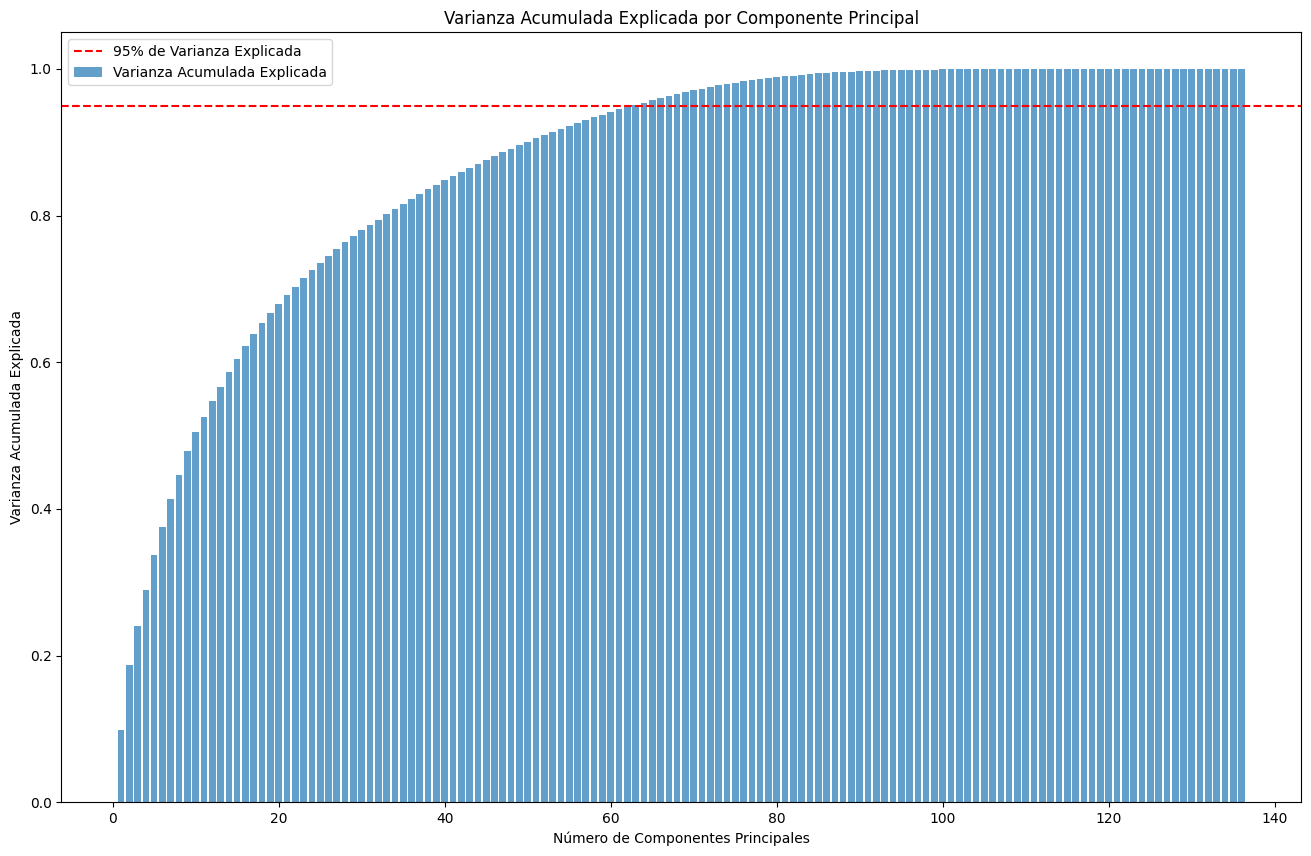

Número de componentes para el 95% de varianza explicada: 63


In [355]:
# Iniciar el modelo PCA y ajustarlo a los datos de entrenamiento
pca = PCA()
pca.fit(X_train_std)

# Obtener la proporción de varianza explicada
explained_variance_ratio = pca.explained_variance_ratio_

# Calcular la cantidad acumulativa de varianza explicada
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Encontrar el número de componentes para el 95% de varianza explicada
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1

# Graficar la varianza explicada acumulativa
plt.figure(figsize=(16, 10))
plt.bar(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, alpha=0.7, align='center', label='Varianza Acumulada Explicada')
plt.axhline(y=0.95, color='red', linestyle='--', label='95% de Varianza Explicada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada')
plt.title('Varianza Acumulada Explicada por Componente Principal')
plt.legend()
plt.show()

print(f"Número de componentes para el 95% de varianza explicada: {n_components_95}")

#### 7.4. Aplicar PCA con el número específico de componentes

In [356]:
# Componente elegido

n_components= 63

In [357]:
pca_n_comp = PCA(n_components=n_components)

In [358]:
X_train_pca = pca_n_comp.fit_transform(X_train_std)
X_test_pca = pca_n_comp.transform(X_test_std)

#### 7.5. Entrenar los modelos:

#### 7.5.1. RidgeClassifier

In [359]:
ridge_classifier = RidgeClassifier()

In [360]:
# Entrenar el modelo
ridge_classifier.fit(X_train_pca, y_train)

RidgeClassifier()

In [361]:
# Realizar predicciones en el conjunto de prueba
predictions_ridge_classifier = ridge_classifier.predict(X_test_pca)

In [362]:
# Evaluar el modelo
accuracy_ridge_classifier = accuracy_score(y_test, predictions_ridge_classifier)

#### 7.5.2. Regresión Logística

In [363]:
logistic_r = LogisticRegression(solver='saga', max_iter=1000)

In [364]:
# Entrenar el modelo
logistic_r.fit(X_train_pca, y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [365]:
# Realizar predicciones en el conjunto de prueba
predictions_logistic_r = logistic_r.predict(X_test_pca)

In [366]:
# Evaluar el modelo
accuracy_logistic_r = accuracy_score(y_test, predictions_logistic_r)

#### 7.5.3. XGboost

In [367]:
xgboost = XGBClassifier()

In [368]:
# Entrenar el modelo
xgboost.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [369]:
# Realizar predicciones en el conjunto de prueba
predictions_xgboost = xgboost.predict(X_test_pca)

In [370]:
# Evaluar el modelo
accuracy_xgboost = accuracy_score(y_test, predictions_xgboost)

#### 7.5.4. Random Forests

In [371]:
random_forest = RandomForestClassifier()

In [372]:
# Entrenar el modelo
random_forest.fit(X_train_pca, y_train)

RandomForestClassifier()

In [373]:
# Realizar predicciones en el conjunto de prueba
predictions_random_forest = random_forest.predict(X_test_pca)

In [374]:
# Evaluar el modelo
accuracy_random_forest = accuracy_score(y_test, predictions_random_forest)

#### 7.5.5. Support Vector Machine (SVM)

In [406]:
svm = SVC(kernel='linear', probability = True)

In [407]:
# Entrenar el modelo
svm.fit(X_train_pca, y_train)

SVC(kernel='linear', probability=True)

In [408]:
# Realizar predicciones en el conjunto de prueba
predictions_svm = svm.predict(X_test_pca)

In [409]:
# Evaluar el modelo
accuracy_svm = accuracy_score(y_test, predictions_svm)

#### 7.6. Evaluar los modelos:

##### 7.6.1 Precisión del modelo:

In [413]:
print("La precisión de los modelos para n_components=63 y variables iniciales ")
print(" ")
print(f"La precisión del modelo RidgeClassifier es: {accuracy_ridge_classifier}")
print(f"La precisión del modelo Regresión Logística es: {accuracy_logistic_r}")
print(f"La precisión del modelo XGboost es: {accuracy_xgboost}")
print(f"La precisión del modelo Random Forests es: {accuracy_random_forest}")
print(f"La precisión del modelo Support Vector Machine es: {accuracy_svm}")

La precisión de los modelos para n_components=63 y variables iniciales 
 
La precisión del modelo RidgeClassifier es: 0.5232558139534884
La precisión del modelo Regresión Logística es: 0.5239018087855297
La precisión del modelo XGboost es: 0.5096899224806202
La precisión del modelo Random Forests es: 0.5361757105943152
La precisión del modelo Support Vector Machine es: 0.5239018087855297


##### 7.6.2. Curva ROC-AUC:

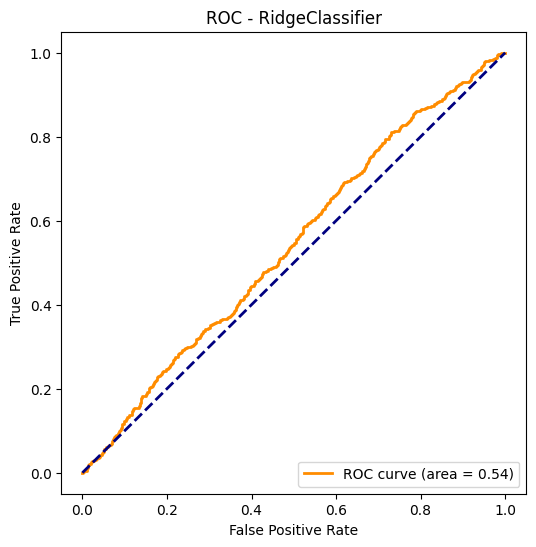

AUC para Regresión Ridge: 0.5415348662521386
 


In [414]:
# Obtener probabilidades de predicción para la clase positiva (clase 1)
y_scores = ridge_classifier.decision_function(X_test_pca)
roc_auc = roc_auc_score(y_test, y_scores)

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC-AUC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - RidgeClassifier')
plt.legend(loc='lower right')
plt.show()

print(f'AUC para Regresión Ridge: {roc_auc}')
print(" ")

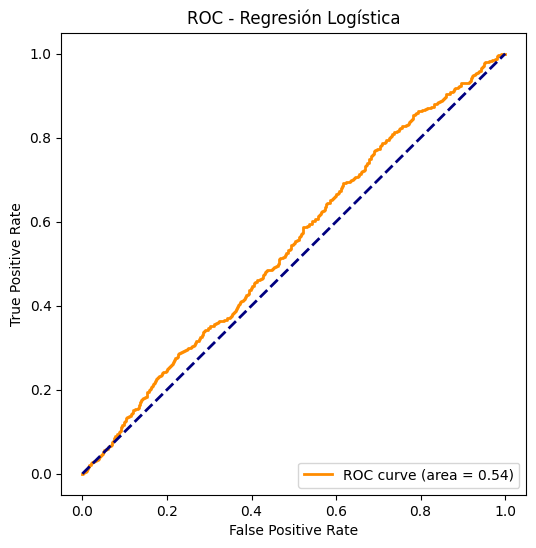

AUC para Regresión Logística: 0.5416951132996703
 


In [415]:
# Obtener probabilidades de predicción para la clase positiva (clase 1)
y_scores = logistic_r.decision_function(X_test_pca)
roc_auc = roc_auc_score(y_test, y_scores)

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC-AUC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Regresión Logística')
plt.legend(loc='lower right')
plt.show()

print(f'AUC para Regresión Logística: {roc_auc}')
print(" ")

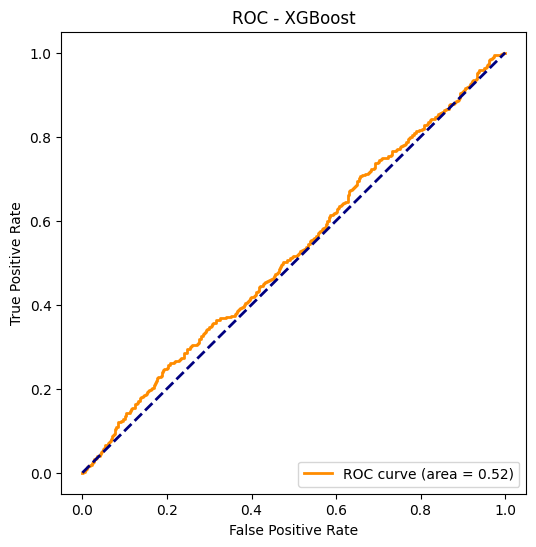

 
AUC para XGBoost: 0.5229328548178442


In [416]:
# Obtener probabilidades de predicción para la clase positiva (clase 1)
y_scores = xgboost.predict_proba(X_test_pca)[:, 1]
roc_auc = roc_auc_score(y_test, y_scores)

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC-AUC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - XGBoost')
plt.legend(loc='lower right')
plt.show()

print(" ")
print(f'AUC para XGBoost: {roc_auc}')


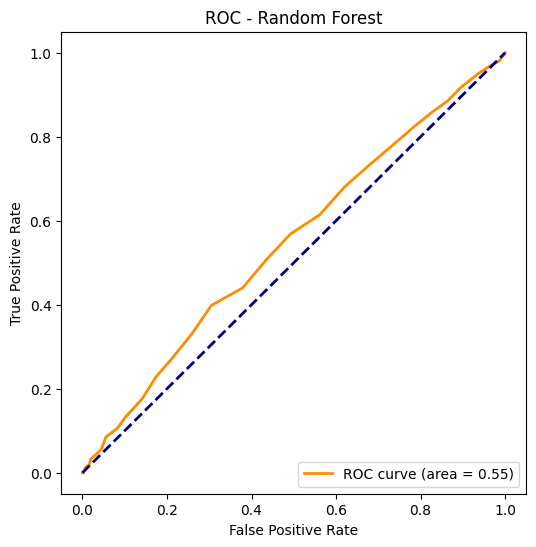

 
AUC para Random Forest: 0.5474414722697494


In [417]:
# Obtener probabilidades de predicción para la clase positiva (clase 1)
y_scores = random_forest.predict_proba(X_test_pca)[:, 1]
roc_auc = roc_auc_score(y_test, y_scores)

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC-AUC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Random Forest')
plt.legend(loc='lower right')
plt.show()

print(" ")
print(f'AUC para Random Forest: {roc_auc}')

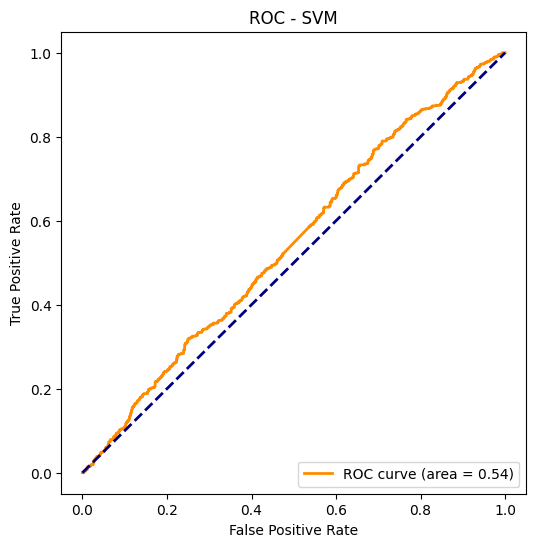

 
AUC para SVM: 0.5428752660351375


In [418]:
# Obtener probabilidades de predicción para la clase positiva (clase 1)
y_scores = svm.predict_proba(X_test_pca)[:, 1]
roc_auc = roc_auc_score(y_test, y_scores)

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC-AUC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - SVM')
plt.legend(loc='lower right')
plt.show()

print(" ")
print(f'AUC para SVM: {roc_auc}')

Comparando los resultados de la precisión de los modelos, ----------ninguno supera el 52% de precisión--------, por ese motivo se procede a agregar más variables.

# 8. Creación de nuevas variables

Cuando el equipo juega en casa, gana el 57% de las veces. Sería bueno igualar o superar ese porcentaje al medir la precisión del modelo.

In [419]:
df_nba.groupby(["home"]).apply(lambda x: x[x["winner"] == 1].shape[0] / x.shape[0])

home
0    0.426145
1    0.573855
dtype: float64

##### Ahora, se procede a crear más variables para volver a evaluar los modelos.

#### 8.1. Nueva variable: ``medias móviles``

Las variables serán **``medias móviles``** de las variables numericas actuales

Se tomará el promedio de estadísticas del equipo en los últimos 10 partidos para saber si será relevante en el desempeño de su próximo partido.

In [420]:
# Las variables después de + ayudarán a calcular las medias móviles

df_rolling = df_nba[list(selected_columns) + ["team", "season", "winner"]]

In [421]:
def find_avg_team(team):
    roll = team.rolling(window = 10).mean()
    return roll

df_rolling = df_rolling.groupby(["team", "season"], group_keys = False).apply(find_avg_team)

<ipython-input-421-6d81b9ae1e9b>:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['team'], dtype='object')
  roll = team.rolling(window = 10).mean()


Los valores nulos corresponden a las filas de inicio de temporada 2013-2014 en las que no hay filas de partidos de la anterior temporada para poder hacer las medias móviles.

In [422]:
df_rolling

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,ORtg,DRtg,FG_max,FGA_max,FG%_max,3P_max,3PA_max,3P%_max,FT_max,FTA_max,FT%_max,ORB_max,DRB_max,TRB_max,AST_max,STL_max,BLK_max,TOV_max,PF_max,PTS_max,+/-_max,TS%_max,eFG%_max,3PAr_max,FTr_max,ORB%_max,DRB%_max,TRB%_max,AST%_max,STL%_max,BLK%_max,TOV%_max,USG%_max,ORtg_max,DRtg_max,BPM_max,total,home,MP_opponent,FG_opponent,FGA_opponent,FG%_opponent,3P_opponent,3PA_opponent,3P%_opponent,FT_opponent,FTA_opponent,FT%_opponent,ORB_opponent,DRB_opponent,TRB_opponent,AST_opponent,STL_opponent,BLK_opponent,TOV_opponent,PF_opponent,PTS_opponent,TS%_opponent,eFG%_opponent,3PAr_opponent,FTr_opponent,ORB%_opponent,DRB%_opponent,TRB%_opponent,AST%_opponent,STL%_opponent,BLK%_opponent,TOV%_opponent,ORtg_opponent,DRtg_opponent,FG_max_opponent,FGA_max_opponent,FG%_max_opponent,3P_max_opponent,3PA_max_opponent,3P%_max_opponent,FT_max_opponent,FTA_max_opponent,FT%_max_opponent,ORB_max_opponent,DRB_max_opponent,TRB_max_opponent,AST_max_opponent,STL_max_opponent,BLK_max_opponent,TOV_max_opponent,PF_max_opponent,PTS_max_opponent,+/-_max_opponent,TS%_max_opponent,eFG%_max_opponent,3PAr_max_opponent,FTr_max_opponent,ORB%_max_opponent,DRB%_max_opponent,TRB%_max_opponent,AST%_max_opponent,STL%_max_opponent,BLK%_max_opponent,TOV%_max_opponent,USG%_max_opponent,ORtg_max_opponent,DRtg_max_opponent,BPM_max_opponent,total_opponent,home_opponent,season,winner
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

##### Fusionar las bases de datos df_nba y df_rolling:


In [423]:
rolling_columns = [f"{column}_10" for column in df_rolling.columns]
df_rolling.columns = rolling_columns

In [424]:
df_nba = pd.concat([df_nba, df_rolling], axis = 1)

In [425]:
df_nba

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,ORtg,DRtg,FG_max,FGA_max,FG%_max,3P_max,3PA_max,3P%_max,FT_max,FTA_max,FT%_max,ORB_max,DRB_max,TRB_max,AST_max,STL_max,BLK_max,TOV_max,PF_max,PTS_max,+/-_max,TS%_max,eFG%_max,3PAr_max,FTr_max,ORB%_max,DRB%_max,TRB%_max,AST%_max,STL%_max,BLK%_max,TOV%_max,USG%_max,ORtg_max,DRtg_max,BPM_max,team,total,home,MP_opponent,FG_opponent,FGA_opponent,FG%_opponent,3P_opponent,3PA_opponent,3P%_opponent,FT_opponent,FTA_opponent,FT%_opponent,ORB_opponent,DRB_opponent,TRB_opponent,AST_opponent,STL_opponent,BLK_opponent,TOV_opponent,PF_opponent,PTS_opponent,TS%_opponent,eFG%_opponent,3PAr_opponent,FTr_opponent,ORB%_opponent,DRB%_opponent,TRB%_opponent,AST%_opponent,STL%_opponent,BLK%_opponent,TOV%_opponent,ORtg_opponent,DRtg_opponent,FG_max_opponent,FGA_max_opponent,FG%_max_opponent,3P_max_opponent,3PA_max_opponent,3P%_max_opponent,FT_max_opponent,FTA_max_opponent,FT%_max_opponent,ORB_max_opponent,DRB_max_opponent,TRB_max_opponent,AST_max_opponent,STL_max_opponent,BLK_max_opponent,TOV_max_opponent,PF_max_opponent,PTS_max_opponent,+/-_max_opponent,TS%_max_opponent,eFG%_max_opponent,3PAr_max_opponent,FTr_max_opponent,ORB%_max_opponent,DRB%_max_opponent,TRB%_max_opponent,AST%_max_opponent,STL%_max_opponent,BLK%_max_opponent,TOV%_max_opponent,USG%_max_opponent,ORtg_max_opponent,DRtg_max_opponent,BPM_max_opponent,team_opponent,total_opponent,home_opponent,season,date,winner,next_winner,MP_10,FG_10,FGA_10,FG%_10,3P_10,3PA_10,3P%_10,FT_10,FTA_10,FT%_10,ORB_10,DRB_10,TRB_10,AST_10,STL_10,BLK_10,TOV_10,PF_10,PTS_10,TS%_10,eFG%_10,3PAr_10,FTr_10,ORB%_10,DRB%_10,TRB%_10,AST%_10,STL%_10,BLK%_10,TOV%_10,ORtg_10,DRtg_10,FG_max_10,FGA_max_10,FG%_max_10,3P_max_10,3PA_max_10,3P%_max_10,FT_max_10,FTA_max_10,FT%_max_10,ORB_max_10,DRB_max_10,TRB_max_10,AST_max_10,STL_max_10,BLK_max_10,TOV_max_10,PF_max_10,PTS_max_10,+/-_max_10,TS%_max_10,eFG%_max_10,3PAr_max_10,FTr_max_10,ORB%_max_10,DRB%_max_10,TRB%_max_10,AST%_max_10,STL%_max_10,BLK%_max_10,TOV%_max_10,USG%_max_10,ORtg_max_10,DRtg_max_10,BPM_max_10,total_10,home_10,MP_opponent_10,FG_opponent_10,FGA_opponent_10,FG%_opponent_10,3P_opponent_10,3PA_opponent_10,3P%_opponent_10,FT_opponent_10,FTA_opponent_10,FT%_opponent_10,ORB_opponent_10,DRB_opponent_10,TRB_opponent_10,AST_opponent_10,STL_opponent_10,BLK_opponent_10,TOV_opponent_10,PF_opponent_10,PTS_opponent_10,TS%_opponent_10,eFG%_opponent_10,3PAr_opponent_10,FTr_opponent_10,ORB%_opponent_10,DRB%_opponent_10,TRB%_opponent_10,AST%_opponent_10,STL%_opponent_10,BLK%_opponent_10,TOV%_opponent_10,ORtg_opponent_10,DRtg_opponent_10,FG_max_opponent_10,FGA_max_opponent_10,FG%_max_opponent_10,3P_max_opponent_10,3PA_max_opponent_10,3P%_max_opponent_10,FT_max_opponent_10,FTA_max_opponent_10,FT%_max_opponent_10,ORB_max_opponent_10,DRB_max_opponent_10,TRB_max_opponent_10,AST_max_opponent_10,STL_max_opponent_10,BLK_max_opponent_10,TOV_max_opponent_10,PF_max_opponent_10,PTS_max_opponent_10,+/-_max_opponent_10,TS%_max_opponent_10,eFG%_max_opponent_10,3PAr_max_opponent_10,FTr_max_opponent_10,ORB%_max_opponent_10,DRB%_max_opponent_10,TRB%_max_opponent_10,AST%_max_opponent_10,STL%_max_opponent_10,BLK%_max_opponent_10,TOV%_max_opponent_10,USG%_max_opponent_10,ORtg_max_opponent_10,DRtg_max_opponent_10,BPM_max_opponent_10,total_opponent_10,home_opponent_10,season_10,winner_10
0,240.0,36.0,93.0,0.387,9.0,19.0,0.474,6.0,10.0,0.600,13.0,26.0,39.0,17.0,10.0,6.0,17.0,26.0,87.0,0.447,0.435,0.204,0.108,27.7,72.2,47.0,47.2,10.5,11.1,14.9,91.6,102.1,8.0,14.0,0.800,3.0,7.0,1.000,3.0,5.0,1.0,5.0,5.0,10.0,7.0,2.0,3.0,5.0,4.0,18.0,10.0,0.900,0.900,0.538,0.455,19.0,37.1,21.6,54.9,3.9,18.5,31.3,30.1,151.0,111.0,17.3,ORL,87,0,240.0,34.0,71.0,0.479,7.0,17.0,0.412,22.0,32.0,0.688,10.0,34.0,44.0,17.0,4.0,18.0,20.0,13.0,97.0,0.570,0.528,0.239,0.451,27.8,72.3,53.0,50.0,4.2,24.3,19.0,102.1,91.6,8.0,16.0,0.750,3.0,6.0,0.667,5.0,7.0,1.000,6.0,10.0,16.0,5.0,2.0,7.0,5.0,5.0,24.0,15.0,0.9

In [426]:
for i in df_nba.columns:
  print(i)

MP
FG
FGA
FG%
3P
3PA
3P%
FT
FTA
FT%
ORB
DRB
TRB
AST
STL
BLK
TOV
PF
PTS
TS%
eFG%
3PAr
FTr
ORB%
DRB%
TRB%
AST%
STL%
BLK%
TOV%
ORtg
DRtg
FG_max
FGA_max
FG%_max
3P_max
3PA_max
3P%_max
FT_max
FTA_max
FT%_max
ORB_max
DRB_max
TRB_max
AST_max
STL_max
BLK_max
TOV_max
PF_max
PTS_max
+/-_max
TS%_max
eFG%_max
3PAr_max
FTr_max
ORB%_max
DRB%_max
TRB%_max
AST%_max
STL%_max
BLK%_max
TOV%_max
USG%_max
ORtg_max
DRtg_max
BPM_max
team
total
home
MP_opponent
FG_opponent
FGA_opponent
FG%_opponent
3P_opponent
3PA_opponent
3P%_opponent
FT_opponent
FTA_opponent
FT%_opponent
ORB_opponent
DRB_opponent
TRB_opponent
AST_opponent
STL_opponent
BLK_opponent
TOV_opponent
PF_opponent
PTS_opponent
TS%_opponent
eFG%_opponent
3PAr_opponent
FTr_opponent
ORB%_opponent
DRB%_opponent
TRB%_opponent
AST%_opponent
STL%_opponent
BLK%_opponent
TOV%_opponent
ORtg_opponent
DRtg_opponent
FG_max_opponent
FGA_max_opponent
FG%_max_opponent
3P_max_opponent
3PA_max_opponent
3P%_max_opponent
FT_max_opponent
FTA_max_opponent
FT%_max_opponen

##### Eliminar las filas con valores nulos:

In [427]:
df_nba = df_nba.dropna()

In [428]:
len(df_nba)

22702

#### 8.2. Nuevas variables:
- ``En el próximo partido, ¿Juega en casa o fuera?``
- ``¿Quién será el próximo oponente?``
- ``¿En qué fecha será el próximo partido?``

In [429]:
pd.set_option('display.max_columns', None)
df_nba

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,ORtg,DRtg,FG_max,FGA_max,FG%_max,3P_max,3PA_max,3P%_max,FT_max,FTA_max,FT%_max,ORB_max,DRB_max,TRB_max,AST_max,STL_max,BLK_max,TOV_max,PF_max,PTS_max,+/-_max,TS%_max,eFG%_max,3PAr_max,FTr_max,ORB%_max,DRB%_max,TRB%_max,AST%_max,STL%_max,BLK%_max,TOV%_max,USG%_max,ORtg_max,DRtg_max,BPM_max,team,total,home,MP_opponent,FG_opponent,FGA_opponent,FG%_opponent,3P_opponent,3PA_opponent,3P%_opponent,FT_opponent,FTA_opponent,FT%_opponent,ORB_opponent,DRB_opponent,TRB_opponent,AST_opponent,STL_opponent,BLK_opponent,TOV_opponent,PF_opponent,PTS_opponent,TS%_opponent,eFG%_opponent,3PAr_opponent,FTr_opponent,ORB%_opponent,DRB%_opponent,TRB%_opponent,AST%_opponent,STL%_opponent,BLK%_opponent,TOV%_opponent,ORtg_opponent,DRtg_opponent,FG_max_opponent,FGA_max_opponent,FG%_max_opponent,3P_max_opponent,3PA_max_opponent,3P%_max_opponent,FT_max_opponent,FTA_max_opponent,FT%_max_opponent,ORB_max_opponent,DRB_max_opponent,TRB_max_opponent,AST_max_opponent,STL_max_opponent,BLK_max_opponent,TOV_max_opponent,PF_max_opponent,PTS_max_opponent,+/-_max_opponent,TS%_max_opponent,eFG%_max_opponent,3PAr_max_opponent,FTr_max_opponent,ORB%_max_opponent,DRB%_max_opponent,TRB%_max_opponent,AST%_max_opponent,STL%_max_opponent,BLK%_max_opponent,TOV%_max_opponent,USG%_max_opponent,ORtg_max_opponent,DRtg_max_opponent,BPM_max_opponent,team_opponent,total_opponent,home_opponent,season,date,winner,next_winner,MP_10,FG_10,FGA_10,FG%_10,3P_10,3PA_10,3P%_10,FT_10,FTA_10,FT%_10,ORB_10,DRB_10,TRB_10,AST_10,STL_10,BLK_10,TOV_10,PF_10,PTS_10,TS%_10,eFG%_10,3PAr_10,FTr_10,ORB%_10,DRB%_10,TRB%_10,AST%_10,STL%_10,BLK%_10,TOV%_10,ORtg_10,DRtg_10,FG_max_10,FGA_max_10,FG%_max_10,3P_max_10,3PA_max_10,3P%_max_10,FT_max_10,FTA_max_10,FT%_max_10,ORB_max_10,DRB_max_10,TRB_max_10,AST_max_10,STL_max_10,BLK_max_10,TOV_max_10,PF_max_10,PTS_max_10,+/-_max_10,TS%_max_10,eFG%_max_10,3PAr_max_10,FTr_max_10,ORB%_max_10,DRB%_max_10,TRB%_max_10,AST%_max_10,STL%_max_10,BLK%_max_10,TOV%_max_10,USG%_max_10,ORtg_max_10,DRtg_max_10,BPM_max_10,total_10,home_10,MP_opponent_10,FG_opponent_10,FGA_opponent_10,FG%_opponent_10,3P_opponent_10,3PA_opponent_10,3P%_opponent_10,FT_opponent_10,FTA_opponent_10,FT%_opponent_10,ORB_opponent_10,DRB_opponent_10,TRB_opponent_10,AST_opponent_10,STL_opponent_10,BLK_opponent_10,TOV_opponent_10,PF_opponent_10,PTS_opponent_10,TS%_opponent_10,eFG%_opponent_10,3PAr_opponent_10,FTr_opponent_10,ORB%_opponent_10,DRB%_opponent_10,TRB%_opponent_10,AST%_opponent_10,STL%_opponent_10,BLK%_opponent_10,TOV%_opponent_10,ORtg_opponent_10,DRtg_opponent_10,FG_max_opponent_10,FGA_max_opponent_10,FG%_max_opponent_10,3P_max_opponent_10,3PA_max_opponent_10,3P%_max_opponent_10,FT_max_opponent_10,FTA_max_opponent_10,FT%_max_opponent_10,ORB_max_opponent_10,DRB_max_opponent_10,TRB_max_opponent_10,AST_max_opponent_10,STL_max_opponent_10,BLK_max_opponent_10,TOV_max_opponent_10,PF_max_opponent_10,PTS_max_opponent_10,+/-_max_opponent_10,TS%_max_opponent_10,eFG%_max_opponent_10,3PAr_max_opponent_10,FTr_max_opponent_10,ORB%_max_opponent_10,DRB%_max_opponent_10,TRB%_max_opponent_10,AST%_max_opponent_10,STL%_max_opponent_10,BLK%_max_opponent_10,TOV%_max_opponent_10,USG%_max_opponent_10,ORtg_max_opponent_10,DRtg_max_opponent_10,BPM_max_opponent_10,total_opponent_10,home_opponent_10,season_10,winner_10
239,240.0,37.0,94.0,0.394,8.0,21.0,0.381,17.0,26.0,0.654,19.0,32.0,51.0,20.0,4.0,9.0,14.0,27.0,99.0,0.469,0.436,0.223,0.277,35.2,58.2,46.8,54.1,4.1,11.4,11.7,102.6,115.1,12.0,27.0,0.545,2.0,6.0,0.667,6.0,6.0,1.0,8.0,10.0,15.0,11.0,3.0,5.0,3.0,5.0,25.0,7.0,0.727,0.667,0.600,0.545,23.4,26.1,21.8,52.3,4.7,9.6,23.3,37.5,157.0,126.0,11.3,LAL,99,0,240.0,40.0,100.0,0.400,6.0,21.0,0.286,25.0,37.0,0.676,23.0,35.0,58.0,23.0,11.0,8.0,8.0,20.0,111.0,0.477,0.430,0.210,0.370,41.8,64.8,53.2,57.5,11.4,11.0,6.4,115.1,102.6,8.0,17.0,0.667,4.0,7.0,0.667,7.0,9.0,1.000,7.0,7.0,13.0,7.0,3.0,4.0,2.0,4.0,23.0,12.0

In [430]:
def shift_column(t, col_name):
    next_col = t[col_name].shift(-1)
    return next_col

def add_column(df, col_name):
    return df.groupby("team", group_keys = False).apply(lambda x: shift_column(x, col_name))

df_nba["next_home"] = add_column(df_nba, "home")
df_nba["team_opponent_next"] = add_column(df_nba, "team_opponent")
df_nba["next_date"] = add_column(df_nba, "date")

<ipython-input-430-ed2a1c194e57>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nba["next_home"] = add_column(df_nba, "home")
<ipython-input-430-ed2a1c194e57>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nba["team_opponent_next"] = add_column(df_nba, "team_opponent")
<ipython-input-430-ed2a1c194e57>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [431]:
pd.set_option('display.max_columns', None)
df_nba

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,ORtg,DRtg,FG_max,FGA_max,FG%_max,3P_max,3PA_max,3P%_max,FT_max,FTA_max,FT%_max,ORB_max,DRB_max,TRB_max,AST_max,STL_max,BLK_max,TOV_max,PF_max,PTS_max,+/-_max,TS%_max,eFG%_max,3PAr_max,FTr_max,ORB%_max,DRB%_max,TRB%_max,AST%_max,STL%_max,BLK%_max,TOV%_max,USG%_max,ORtg_max,DRtg_max,BPM_max,team,total,home,MP_opponent,FG_opponent,FGA_opponent,FG%_opponent,3P_opponent,3PA_opponent,3P%_opponent,FT_opponent,FTA_opponent,FT%_opponent,ORB_opponent,DRB_opponent,TRB_opponent,AST_opponent,STL_opponent,BLK_opponent,TOV_opponent,PF_opponent,PTS_opponent,TS%_opponent,eFG%_opponent,3PAr_opponent,FTr_opponent,ORB%_opponent,DRB%_opponent,TRB%_opponent,AST%_opponent,STL%_opponent,BLK%_opponent,TOV%_opponent,ORtg_opponent,DRtg_opponent,FG_max_opponent,FGA_max_opponent,FG%_max_opponent,3P_max_opponent,3PA_max_opponent,3P%_max_opponent,FT_max_opponent,FTA_max_opponent,FT%_max_opponent,ORB_max_opponent,DRB_max_opponent,TRB_max_opponent,AST_max_opponent,STL_max_opponent,BLK_max_opponent,TOV_max_opponent,PF_max_opponent,PTS_max_opponent,+/-_max_opponent,TS%_max_opponent,eFG%_max_opponent,3PAr_max_opponent,FTr_max_opponent,ORB%_max_opponent,DRB%_max_opponent,TRB%_max_opponent,AST%_max_opponent,STL%_max_opponent,BLK%_max_opponent,TOV%_max_opponent,USG%_max_opponent,ORtg_max_opponent,DRtg_max_opponent,BPM_max_opponent,team_opponent,total_opponent,home_opponent,season,date,winner,next_winner,MP_10,FG_10,FGA_10,FG%_10,3P_10,3PA_10,3P%_10,FT_10,FTA_10,FT%_10,ORB_10,DRB_10,TRB_10,AST_10,STL_10,BLK_10,TOV_10,PF_10,PTS_10,TS%_10,eFG%_10,3PAr_10,FTr_10,ORB%_10,DRB%_10,TRB%_10,AST%_10,STL%_10,BLK%_10,TOV%_10,ORtg_10,DRtg_10,FG_max_10,FGA_max_10,FG%_max_10,3P_max_10,3PA_max_10,3P%_max_10,FT_max_10,FTA_max_10,FT%_max_10,ORB_max_10,DRB_max_10,TRB_max_10,AST_max_10,STL_max_10,BLK_max_10,TOV_max_10,PF_max_10,PTS_max_10,+/-_max_10,TS%_max_10,eFG%_max_10,3PAr_max_10,FTr_max_10,ORB%_max_10,DRB%_max_10,TRB%_max_10,AST%_max_10,STL%_max_10,BLK%_max_10,TOV%_max_10,USG%_max_10,ORtg_max_10,DRtg_max_10,BPM_max_10,total_10,home_10,MP_opponent_10,FG_opponent_10,FGA_opponent_10,FG%_opponent_10,3P_opponent_10,3PA_opponent_10,3P%_opponent_10,FT_opponent_10,FTA_opponent_10,FT%_opponent_10,ORB_opponent_10,DRB_opponent_10,TRB_opponent_10,AST_opponent_10,STL_opponent_10,BLK_opponent_10,TOV_opponent_10,PF_opponent_10,PTS_opponent_10,TS%_opponent_10,eFG%_opponent_10,3PAr_opponent_10,FTr_opponent_10,ORB%_opponent_10,DRB%_opponent_10,TRB%_opponent_10,AST%_opponent_10,STL%_opponent_10,BLK%_opponent_10,TOV%_opponent_10,ORtg_opponent_10,DRtg_opponent_10,FG_max_opponent_10,FGA_max_opponent_10,FG%_max_opponent_10,3P_max_opponent_10,3PA_max_opponent_10,3P%_max_opponent_10,FT_max_opponent_10,FTA_max_opponent_10,FT%_max_opponent_10,ORB_max_opponent_10,DRB_max_opponent_10,TRB_max_opponent_10,AST_max_opponent_10,STL_max_opponent_10,BLK_max_opponent_10,TOV_max_opponent_10,PF_max_opponent_10,PTS_max_opponent_10,+/-_max_opponent_10,TS%_max_opponent_10,eFG%_max_opponent_10,3PAr_max_opponent_10,FTr_max_opponent_10,ORB%_max_opponent_10,DRB%_max_opponent_10,TRB%_max_opponent_10,AST%_max_opponent_10,STL%_max_opponent_10,BLK%_max_opponent_10,TOV%_max_opponent_10,USG%_max_opponent_10,ORtg_max_opponent_10,DRtg_max_opponent_10,BPM_max_opponent_10,total_opponent_10,home_opponent_10,season_10,winner_10,next_home,team_opponent_next,next_date
239,240.0,37.0,94.0,0.394,8.0,21.0,0.381,17.0,26.0,0.654,19.0,32.0,51.0,20.0,4.0,9.0,14.0,27.0,99.0,0.469,0.436,0.223,0.277,35.2,58.2,46.8,54.1,4.1,11.4,11.7,102.6,115.1,12.0,27.0,0.545,2.0,6.0,0.667,6.0,6.0,1.0,8.0,10.0,15.0,11.0,3.0,5.0,3.0,5.0,25.0,7.0,0.727,0.667,0.600,0.545,23.4,26.1,21.8,52.3,4.7,9.6,23.3,37.5,157.0,126.0,11.3,LAL,99,0,240.0,40.0,100.0,0.400,6.0,21.0,0.286,25.0,37.0,0.676,23.0,35.0,58.0,23.0,11.0,8.0,8.0,20.0,111.0,0.477,0.430,0.210,0.370,41.8,64.8,53.2,57.5,11.4,11.0,6.4,115.1,102.6,8.0,17.0,0.667,4.0,7.0,0.667,7.0,9.0,1.000,7.0

In [432]:
for i in df_nba.columns:
  print(i)

MP
FG
FGA
FG%
3P
3PA
3P%
FT
FTA
FT%
ORB
DRB
TRB
AST
STL
BLK
TOV
PF
PTS
TS%
eFG%
3PAr
FTr
ORB%
DRB%
TRB%
AST%
STL%
BLK%
TOV%
ORtg
DRtg
FG_max
FGA_max
FG%_max
3P_max
3PA_max
3P%_max
FT_max
FTA_max
FT%_max
ORB_max
DRB_max
TRB_max
AST_max
STL_max
BLK_max
TOV_max
PF_max
PTS_max
+/-_max
TS%_max
eFG%_max
3PAr_max
FTr_max
ORB%_max
DRB%_max
TRB%_max
AST%_max
STL%_max
BLK%_max
TOV%_max
USG%_max
ORtg_max
DRtg_max
BPM_max
team
total
home
MP_opponent
FG_opponent
FGA_opponent
FG%_opponent
3P_opponent
3PA_opponent
3P%_opponent
FT_opponent
FTA_opponent
FT%_opponent
ORB_opponent
DRB_opponent
TRB_opponent
AST_opponent
STL_opponent
BLK_opponent
TOV_opponent
PF_opponent
PTS_opponent
TS%_opponent
eFG%_opponent
3PAr_opponent
FTr_opponent
ORB%_opponent
DRB%_opponent
TRB%_opponent
AST%_opponent
STL%_opponent
BLK%_opponent
TOV%_opponent
ORtg_opponent
DRtg_opponent
FG_max_opponent
FGA_max_opponent
FG%_max_opponent
3P_max_opponent
3PA_max_opponent
3P%_max_opponent
FT_max_opponent
FTA_max_opponent
FT%_max_opponen

In [434]:
full_df_nba = df_nba.merge(df_nba[rolling_columns + ["team", "team_opponent_next", "next_date"]],
                            left_on = ["team", "next_date"],
                            right_on = ["team_opponent_next", "next_date"],
                            suffixes=('_x', '_z'))

In [435]:
pd.set_option('display.max_columns', None)
pd.reset_option('display.max_rows')
full_df_nba

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,ORtg,DRtg,FG_max,FGA_max,FG%_max,3P_max,3PA_max,3P%_max,FT_max,FTA_max,FT%_max,ORB_max,DRB_max,TRB_max,AST_max,STL_max,BLK_max,TOV_max,PF_max,PTS_max,+/-_max,TS%_max,eFG%_max,3PAr_max,FTr_max,ORB%_max,DRB%_max,TRB%_max,AST%_max,STL%_max,BLK%_max,TOV%_max,USG%_max,ORtg_max,DRtg_max,BPM_max,team_x,total,home,MP_opponent,FG_opponent,FGA_opponent,FG%_opponent,3P_opponent,3PA_opponent,3P%_opponent,FT_opponent,FTA_opponent,FT%_opponent,ORB_opponent,DRB_opponent,TRB_opponent,AST_opponent,STL_opponent,BLK_opponent,TOV_opponent,PF_opponent,PTS_opponent,TS%_opponent,eFG%_opponent,3PAr_opponent,FTr_opponent,ORB%_opponent,DRB%_opponent,TRB%_opponent,AST%_opponent,STL%_opponent,BLK%_opponent,TOV%_opponent,ORtg_opponent,DRtg_opponent,FG_max_opponent,FGA_max_opponent,FG%_max_opponent,3P_max_opponent,3PA_max_opponent,3P%_max_opponent,FT_max_opponent,FTA_max_opponent,FT%_max_opponent,ORB_max_opponent,DRB_max_opponent,TRB_max_opponent,AST_max_opponent,STL_max_opponent,BLK_max_opponent,TOV_max_opponent,PF_max_opponent,PTS_max_opponent,+/-_max_opponent,TS%_max_opponent,eFG%_max_opponent,3PAr_max_opponent,FTr_max_opponent,ORB%_max_opponent,DRB%_max_opponent,TRB%_max_opponent,AST%_max_opponent,STL%_max_opponent,BLK%_max_opponent,TOV%_max_opponent,USG%_max_opponent,ORtg_max_opponent,DRtg_max_opponent,BPM_max_opponent,team_opponent,total_opponent,home_opponent,season,date,winner,next_winner,MP_10_x,FG_10_x,FGA_10_x,FG%_10_x,3P_10_x,3PA_10_x,3P%_10_x,FT_10_x,FTA_10_x,FT%_10_x,ORB_10_x,DRB_10_x,TRB_10_x,AST_10_x,STL_10_x,BLK_10_x,TOV_10_x,PF_10_x,PTS_10_x,TS%_10_x,eFG%_10_x,3PAr_10_x,FTr_10_x,ORB%_10_x,DRB%_10_x,TRB%_10_x,AST%_10_x,STL%_10_x,BLK%_10_x,TOV%_10_x,ORtg_10_x,DRtg_10_x,FG_max_10_x,FGA_max_10_x,FG%_max_10_x,3P_max_10_x,3PA_max_10_x,3P%_max_10_x,FT_max_10_x,FTA_max_10_x,FT%_max_10_x,ORB_max_10_x,DRB_max_10_x,TRB_max_10_x,AST_max_10_x,STL_max_10_x,BLK_max_10_x,TOV_max_10_x,PF_max_10_x,PTS_max_10_x,+/-_max_10_x,TS%_max_10_x,eFG%_max_10_x,3PAr_max_10_x,FTr_max_10_x,ORB%_max_10_x,DRB%_max_10_x,TRB%_max_10_x,AST%_max_10_x,STL%_max_10_x,BLK%_max_10_x,TOV%_max_10_x,USG%_max_10_x,ORtg_max_10_x,DRtg_max_10_x,BPM_max_10_x,total_10_x,home_10_x,MP_opponent_10_x,FG_opponent_10_x,FGA_opponent_10_x,FG%_opponent_10_x,3P_opponent_10_x,3PA_opponent_10_x,3P%_opponent_10_x,FT_opponent_10_x,FTA_opponent_10_x,FT%_opponent_10_x,ORB_opponent_10_x,DRB_opponent_10_x,TRB_opponent_10_x,AST_opponent_10_x,STL_opponent_10_x,BLK_opponent_10_x,TOV_opponent_10_x,PF_opponent_10_x,PTS_opponent_10_x,TS%_opponent_10_x,eFG%_opponent_10_x,3PAr_opponent_10_x,FTr_opponent_10_x,ORB%_opponent_10_x,DRB%_opponent_10_x,TRB%_opponent_10_x,AST%_opponent_10_x,STL%_opponent_10_x,BLK%_opponent_10_x,TOV%_opponent_10_x,ORtg_opponent_10_x,DRtg_opponent_10_x,FG_max_opponent_10_x,FGA_max_opponent_10_x,FG%_max_opponent_10_x,3P_max_opponent_10_x,3PA_max_opponent_10_x,3P%_max_opponent_10_x,FT_max_opponent_10_x,FTA_max_opponent_10_x,FT%_max_opponent_10_x,ORB_max_opponent_10_x,DRB_max_opponent_10_x,TRB_max_opponent_10_x,AST_max_opponent_10_x,STL_max_opponent_10_x,BLK_max_opponent_10_x,TOV_max_opponent_10_x,PF_max_opponent_10_x,PTS_max_opponent_10_x,+/-_max_opponent_10_x,TS%_max_opponent_10_x,eFG%_max_opponent_10_x,3PAr_max_opponent_10_x,FTr_max_opponent_10_x,ORB%_max_opponent_10_x,DRB%_max_opponent_10_x,TRB%_max_opponent_10_x,AST%_max_opponent_10_x,STL%_max_opponent_10_x,BLK%_max_opponent_10_x,TOV%_max_opponent_10_x,USG%_max_opponent_10_x,ORtg_max_opponent_10_x,DRtg_max_opponent_10_x,BPM_max_opponent_10_x,total_opponent_10_x,home_opponent_10_x,season_10_x,winner_10_x,next_home,team_opponent_next_x,next_date,MP_10_z,FG_10_z,FGA_10_z,FG%_10_z,3P_10_z,3PA_10_z,3P%_10_z,FT_10_z,FTA_10_z,FT%_10_z,ORB_10_z,DRB_10_z,TRB_10_z,AST_10_z,STL_10_z,BLK_10_z,TOV_10_z,PF_10_z,PTS_10_z,TS%_10_z,eFG%_10_z,3PAr_10_z,FTr_10_z,ORB%_10_z,DRB%_10_z,TRB%_10_z,AST%_10_z,STL%_10_z,BLK%_10_z,TOV%_10_z,ORtg

In [436]:
for i in full_df_nba.columns:
  print(i)

MP
FG
FGA
FG%
3P
3PA
3P%
FT
FTA
FT%
ORB
DRB
TRB
AST
STL
BLK
TOV
PF
PTS
TS%
eFG%
3PAr
FTr
ORB%
DRB%
TRB%
AST%
STL%
BLK%
TOV%
ORtg
DRtg
FG_max
FGA_max
FG%_max
3P_max
3PA_max
3P%_max
FT_max
FTA_max
FT%_max
ORB_max
DRB_max
TRB_max
AST_max
STL_max
BLK_max
TOV_max
PF_max
PTS_max
+/-_max
TS%_max
eFG%_max
3PAr_max
FTr_max
ORB%_max
DRB%_max
TRB%_max
AST%_max
STL%_max
BLK%_max
TOV%_max
USG%_max
ORtg_max
DRtg_max
BPM_max
team_x
total
home
MP_opponent
FG_opponent
FGA_opponent
FG%_opponent
3P_opponent
3PA_opponent
3P%_opponent
FT_opponent
FTA_opponent
FT%_opponent
ORB_opponent
DRB_opponent
TRB_opponent
AST_opponent
STL_opponent
BLK_opponent
TOV_opponent
PF_opponent
PTS_opponent
TS%_opponent
eFG%_opponent
3PAr_opponent
FTr_opponent
ORB%_opponent
DRB%_opponent
TRB%_opponent
AST%_opponent
STL%_opponent
BLK%_opponent
TOV%_opponent
ORtg_opponent
DRtg_opponent
FG_max_opponent
FGA_max_opponent
FG%_max_opponent
3P_max_opponent
3PA_max_opponent
3P%_max_opponent
FT_max_opponent
FTA_max_opponent
FT%_max_oppon

##### En la siguiente tabla explico la base de datos obtenida:

La columna ``team`` pasa a ser ``team_x`` e incluye la abreviatura del equipo que queremos saber si ganará o no el siguiente partido, en este caso, San Antonio Spurs.

La columna ``team_opponent`` incluye la información del contrincante del partido actual Uta Jazz.

Utah Jazz juega como equipo local (``home``) el 15 de noviembre de 2013 (``date``).

San Antonio Spurs ganó con 91 puntos sobre 82 (``total`` y ``total_opponent``).

El próximo equipo que jugará contra San Antonio Spurs será Boston Celtics (``team_opponent_next_x`` y ``team_z``; estas columnas están duplicadas), la fecha del próximo partido será el 20 de noviembre de 2013. Y el próximo oponente de Boston Celtics será San Antonio Spurs (``team_opponent_next_z``).

In [437]:
full_df_nba[["team_x", "team_opponent", "home", "date", "total", "total_opponent", "team_opponent_next_x", "team_z", "team_opponent_next_z", "season", "next_date"]]

,team_x,team_opponent,home,date,total,total_opponent,team_opponent_next_x,team_z,team_opponent_next_z,season,next_date
0,SAS,UTA,0,2013-11-15,91,82,BOS,BOS,SAS,2013,2013-11-20
1,BOS,POR,1,2013-11-15,96,109,MIN,MIN,BOS,2013,2013-11-16
2,MIN,DEN,0,2013-11-15,113,117,BOS,BOS,MIN,2013,2013-11-16
3,BOS,MIN,0,2013-11-16,88,106,HOU,HOU,BOS,2013,2013-11-19
4,CLE,WAS,0,2013-11-16,103,96,WAS,WAS,CLE,2013,2013-11-20
...,...,...,...,...,...,...,...,...,...,...,...
22515,MIA,DEN,0,2023-06-04,111,108,DEN,DEN,MIA,2023,2023-06-07
22516,MIA,DEN,1,2023-06-07,94,109,DEN,DEN,MIA,2023,2023-06-09
22517,DEN,MIA,0,2023-06-07,109,94,MIA,MIA,DEN,2023,2023-06-09
22518,MIA,DEN,1,2023-06-09,95,108,DEN,DEN,MIA,2023,2023-06-12


Las estadísticas obtenidas hasta ahora son aquellas que relacionan al equipo que juega en casa frente a su contriincante.

"team" es el equipo que juega en casa.

Las estadísticas sin "_(más abreviatura)" son las estadísticas totales del equipo que juega en casa, es decir, el equipo que se encuentra en la columna "team".

"total" es el total de puntos obtenidos por el equipo que juega en casa, es decir, el equipo de la columna "team".

Las estadísticas con "_max" son los valores máximos de las estadísticas del equipo que juega en casa, es decir, de entre todos los jugadores se escogen aquellos valores máximos para cada estadística.

Las estadísticas terminadas en "_opponent" son las estadísticas totales del equipo oponente contra el que juega el equipo que se encuentra en la columna "team".

Las estadísticas terminanas en "_max_opponent" son las estadísticas del oponente (el que juega como visitante), escogiendo el valor máximo de entre todos los jugadores oponentes de ese partido y para cada estadística.

"team_opponent" es el equipo que juega como visitante.

"home_opponent" dice si el oponente juega en casa o no.

"season" es la temporada en la que se juega el partido. Por ejemplo, de la temporada 2013-2014, el valor que aparece en season es 2014.

"date" es la fecha del partido.

"winner" dice si el equipo que aparece en "team" gana o pierde el partido.

"next_winner" dice si el equipo que aparece en "team" ganará o perderá el siguiente partido.

Las variables terminadas en "_10" refleja la media móvil de las estadísticas de los 10 últimos partidos del equipo local ("team").

"next_home" dice si el próximo partido del equipo que está en "team" será en casa.

"team_opponent_next" dice quién será el próximo oponente del equipo que está en "team".

"next_date" dice la próxima fecha de partido.



# 9. Creación de los modelos de Aprendizaje Automático con las nuevas variables

In [438]:
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, roc_auc_score

#### 9.1. Cargar datos

PCA funciona mejor con variables numéricas, así que excluyo las variables que no sean numéricas.

In [439]:
removed_columns = ["team", "team_opponent", "season", "date", "winner", "next_winner"]

new_removed_columns = list(full_df_nba.columns[full_df_nba.dtypes == "object"]) + removed_columns

new_selected_columns = full_df_nba.columns[~full_df_nba.columns.isin(new_removed_columns)]

In [440]:
new_selected_columns

Index(['MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%',
       ...
       'BLK%_max_opponent_10_z', 'TOV%_max_opponent_10_z',
       'USG%_max_opponent_10_z', 'ORtg_max_opponent_10_z',
       'DRtg_max_opponent_10_z', 'BPM_max_opponent_10_z',
       'total_opponent_10_z', 'home_opponent_10_z', 'season_10_z',
       'winner_10_z'],
      dtype='object', length=413)

#### 9.2. Dividir los datos en conjunto de entrenamiento y prueba

Los datos siguien una serie temporal, así que la división de los datos se realiza mediante una función.

In [441]:
def train_test_data(data, predictors, start=2, step=1):
    seasons = sorted(data["season"].unique())

    # Elegir 2 años+ para test y los anteriores para train
    for i in range(start, len(seasons), step):
        season = seasons[i]
        train = data[data["season"].isin(seasons[:i])]
        test = data[data["season"] == season]

        # Separar en variables predictoras (X) y variable objetivo (y)
        X_train, y_train = train[predictors], train["next_winner"]
        X_test, y_test = test[predictors], test["next_winner"]

        # Estandarizar los datos
        scaler = StandardScaler()
        X_train_std = scaler.fit_transform(X_train)
        X_test_std = scaler.transform(X_test)

    return X_train_std, X_test_std, y_train, y_test

In [442]:
X_train_std, X_test_std, y_train, y_test = train_test_data(full_df_nba, new_selected_columns)

**X_train_std**

**X_test_std**

y_train

y_test

#### 9.3. Gráfica PCA

Con esta gráfica obtengo el número de componentes.

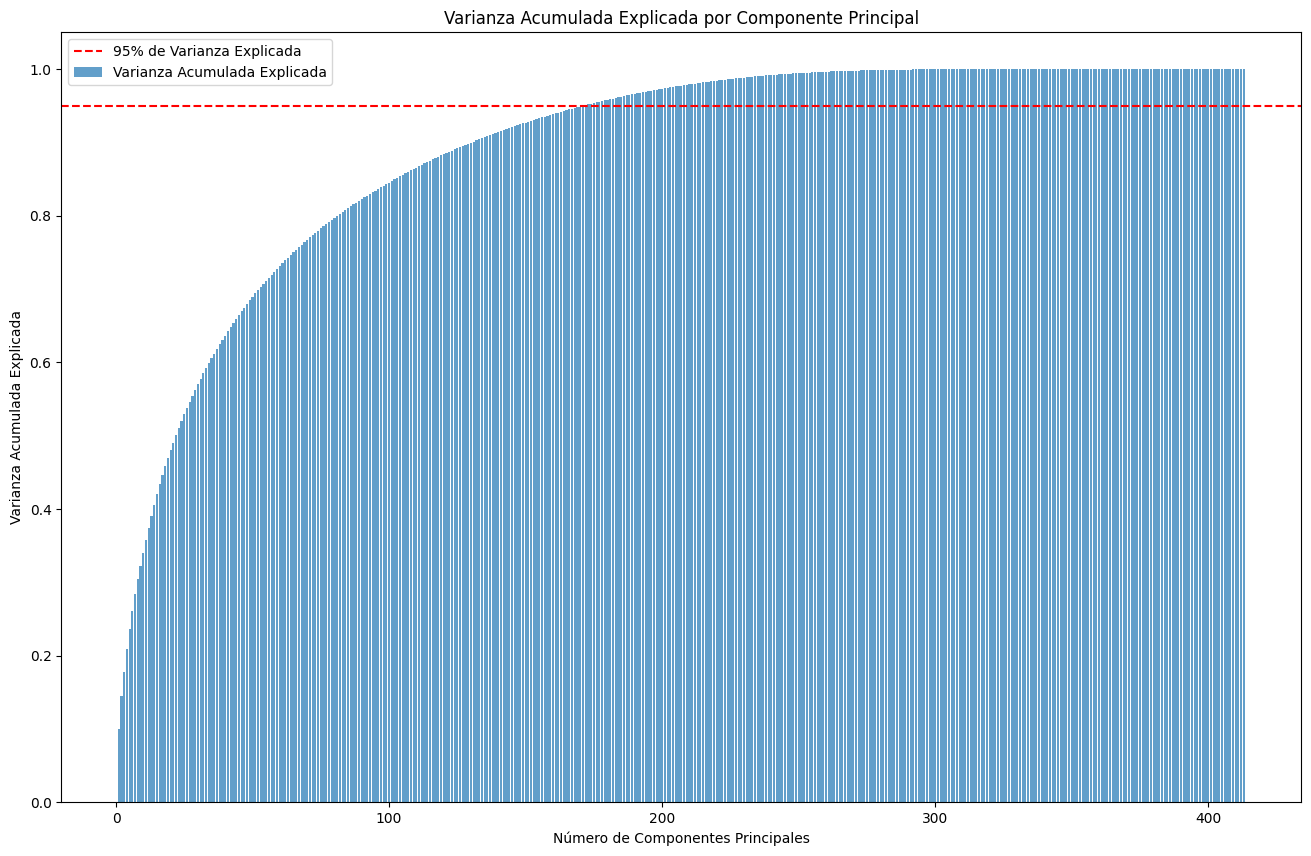

Número de componentes para el 95% de varianza explicada: 172


In [444]:
# Iniciar el modelo PCA y ajustarlo a los datos de entrenamiento
pca = PCA()
pca.fit(X_train_std)

# Obtener la proporción de varianza explicada
explained_variance_ratio = pca.explained_variance_ratio_

# Calcular la cantidad acumulativa de varianza explicada
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Encontrar el número de componentes para el 95% de varianza explicada
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1

# Graficar la varianza explicada acumulativa
plt.figure(figsize=(16, 10))
plt.bar(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, alpha=0.7, align='center', label='Varianza Acumulada Explicada')
plt.axhline(y=0.95, color='red', linestyle='--', label='95% de Varianza Explicada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada')
plt.title('Varianza Acumulada Explicada por Componente Principal')
plt.legend()
plt.show()

print(f"Número de componentes para el 95% de varianza explicada: {n_components_95}")

#### 9.4. Aplicar PCA con el número específico de componentes

In [445]:
# Componente elegido RELLENAR RELLENAR RELLENAR

n_components= 172

In [446]:
pca_n_comp = PCA(n_components=n_components)

In [447]:
X_train_pca = pca_n_comp.fit_transform(X_train_std)
X_test_pca = pca_n_comp.transform(X_test_std)

#### 9.5. Entrenar los modelos:

#### 9.5.1. RidgeClassifier

In [448]:
ridge_classifier = RidgeClassifier()

In [449]:
# Entrenar el modelo
ridge_classifier.fit(X_train_pca, y_train)

RidgeClassifier()

In [450]:
# Realizar predicciones en el conjunto de prueba
predictions_ridge_classifier = ridge_classifier.predict(X_test_pca)

In [451]:
# Evaluar el modelo
accuracy_ridge_classifier = accuracy_score(y_test, predictions_ridge_classifier)

#### 9.5.2. Regresión Logística

In [452]:
logistic_r = LogisticRegression(solver='saga', max_iter=1000)

In [453]:
# Entrenar el modelo
logistic_r.fit(X_train_pca, y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [454]:
# Realizar predicciones en el conjunto de prueba
predictions_logistic_r = logistic_r.predict(X_test_pca)

In [455]:
# Evaluar el modelo
accuracy_logistic_r = accuracy_score(y_test, predictions_logistic_r)

#### 9.5.3. XGboost

In [456]:
xgboost = XGBClassifier()

In [457]:
# Entrenar el modelo
xgboost.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [458]:
# Realizar predicciones en el conjunto de prueba
predictions_xgboost = xgboost.predict(X_test_pca)

In [459]:
# Evaluar el modelo
accuracy_xgboost = accuracy_score(y_test, predictions_xgboost)

#### 9.5.4. Random Forests

In [460]:
random_forest = RandomForestClassifier()

In [461]:
# Entrenar el modelo
random_forest.fit(X_train_pca, y_train)

RandomForestClassifier()

In [462]:
# Realizar predicciones en el conjunto de prueba
predictions_random_forest = random_forest.predict(X_test_pca)

In [463]:
# Evaluar el modelo
accuracy_random_forest = accuracy_score(y_test, predictions_random_forest)

#### 9.5.5. Support Vector Machine (SVM)

In [477]:
svm = SVC(kernel='linear', probability = True)

In [478]:
# Entrenar el modelo
svm.fit(X_train_pca, y_train)

SVC(kernel='linear', probability=True)

In [479]:
# Realizar predicciones en el conjunto de prueba
predictions_svm = svm.predict(X_test_pca)

In [480]:
# Evaluar el modelo
accuracy_svm = accuracy_score(y_test, predictions_svm)

#### 9.6. Evaluar los modelos con las nuevas variables:

In [481]:
print("La precisión de los modelos para n_components=172 y variables iniciales + variables nuevas: ")
print(" ")
print(f"La precisión del modelo RidgeClassifier es: {accuracy_ridge_classifier}")
print(f"La precisión del modelo Regresión Logística es: {accuracy_logistic_r}")
print(f"La precisión del modelo XGboost es: {accuracy_xgboost}")
print(f"La precisión del modelo Random Forests es: {accuracy_random_forest}")
print(f"La precisión del modelo Support Vector Machine es: {accuracy_svm}")

La precisión de los modelos para n_components=172 y variables iniciales + variables nuevas: 
 
La precisión del modelo RidgeClassifier es: 0.5905448717948718
La precisión del modelo Regresión Logística es: 0.5905448717948718
La precisión del modelo XGboost es: 0.5841346153846154
La precisión del modelo Random Forests es: 0.5608974358974359
La precisión del modelo Support Vector Machine es: 0.6001602564102564


##### 9.7. Curva ROC-AUC:

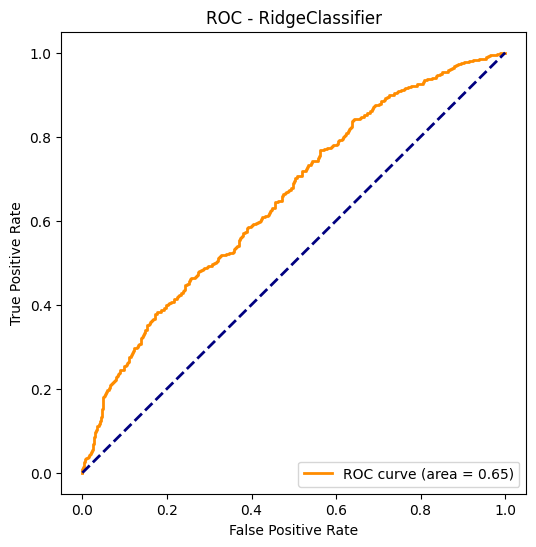

AUC para Regresión Ridge: 0.6512539325842697
 


In [470]:
# Obtener probabilidades de predicción para la clase positiva (clase 1)
y_scores = ridge_classifier.decision_function(X_test_pca)
roc_auc = roc_auc_score(y_test, y_scores)

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC-AUC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - RidgeClassifier')
plt.legend(loc='lower right')
plt.show()

print(f'AUC para Regresión Ridge: {roc_auc}')
print(" ")

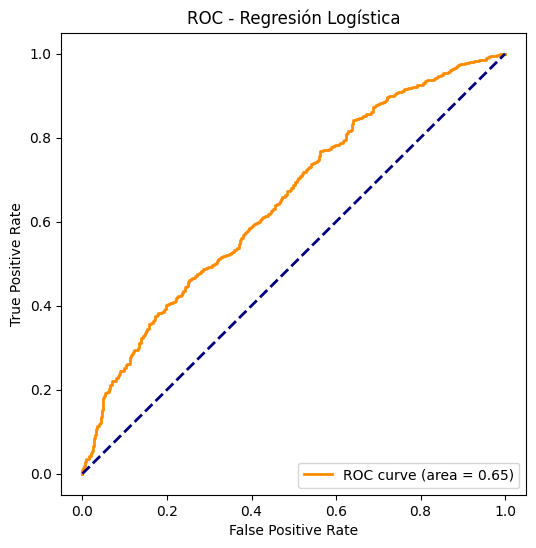

AUC para Regresión Logística: 0.6509560192616373
 


In [471]:
# Obtener probabilidades de predicción para la clase positiva (clase 1)
y_scores = logistic_r.decision_function(X_test_pca)
roc_auc = roc_auc_score(y_test, y_scores)

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC-AUC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Regresión Logística')
plt.legend(loc='lower right')
plt.show()

print(f'AUC para Regresión Logística: {roc_auc}')
print(" ")

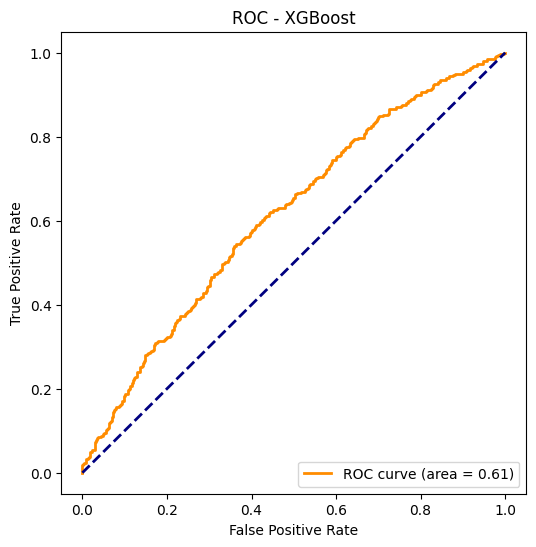

 
AUC para XGBoost: 0.6149650080256822


In [472]:
# Obtener probabilidades de predicción para la clase positiva (clase 1)
y_scores = xgboost.predict_proba(X_test_pca)[:, 1]
roc_auc = roc_auc_score(y_test, y_scores)

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC-AUC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - XGBoost')
plt.legend(loc='lower right')
plt.show()

print(" ")
print(f'AUC para XGBoost: {roc_auc}')


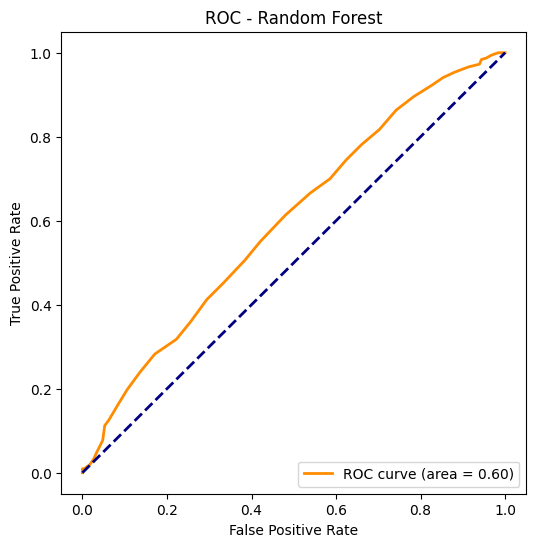

 
AUC para Random Forest: 0.5977438202247192


In [473]:
# Obtener probabilidades de predicción para la clase positiva (clase 1)
y_scores = random_forest.predict_proba(X_test_pca)[:, 1]
roc_auc = roc_auc_score(y_test, y_scores)

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC-AUC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Random Forest')
plt.legend(loc='lower right')
plt.show()

print(" ")
print(f'AUC para Random Forest: {roc_auc}')

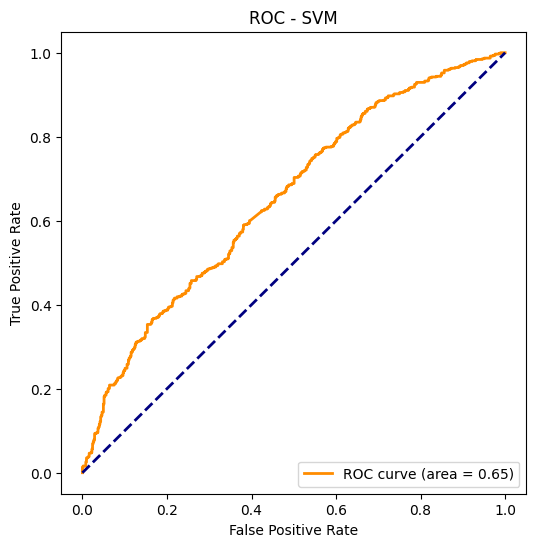

 
AUC para SVM: 0.651921669341894


In [482]:
# Obtener probabilidades de predicción para la clase positiva (clase 1)
y_scores = svm.predict_proba(X_test_pca)[:, 1]
roc_auc = roc_auc_score(y_test, y_scores)

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC-AUC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - SVM')
plt.legend(loc='lower right')
plt.show()

print(" ")
print(f'AUC para SVM: {roc_auc}')